In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter

In [2]:
figw=10
figh=4
font=20
label=15
cap=5
eline=5
wt_face = 'black'
wt_marker='o'
rela_face='whitesmoke'
rela_marker='s'
ssize=300
color_dict = {
    'glycerol': 'green',
    'glucose': 'blue',
    'succinate': '#CC7722',
    'acetate' : 'grey', ##c20078
    'glutamate' : 'grey',
    'aspartate' : 'grey',
}

def darken_color(color, amount=0.3):
    """
    Darken a given color.
    
    Parameters:
    color (str): The hex color code.
    amount (float): The amount to darken the color. Should be between 0 and 1.

    Returns:
    str: The hex color code of the darkened color.
    """
    c = mcolors.cnames.get(color, color)
    c = mcolors.hex2color(c)
    c = mcolors.rgb_to_hsv(c)
    c[2] = c[2] * (1 - amount)
    c = mcolors.hsv_to_rgb(c)
    return mcolors.to_hex(c)


ml = MultipleLocator(5)

### Load Zhu 2019 RNA/protein vs growth rate data and plot the growth law

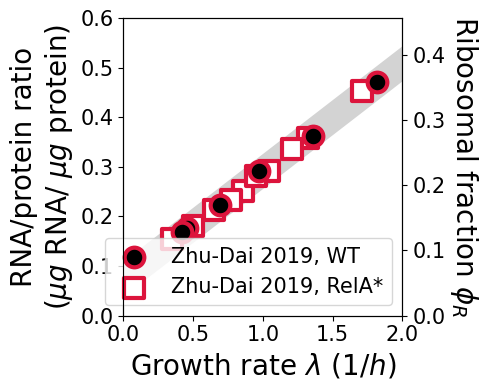

In [3]:
zhu_R = pd.read_csv('data/RNAProteinRatio-ZHU.csv')
zhu_wt=zhu_R.loc[zhu_R['Strain']=='WT']
zhu_star=zhu_R.loc[(zhu_R['Strain']=='pTetRelA')]
zhu_wt_lb=zhu_wt.loc[(zhu_wt['Carbon Source']=='LB')]
zhu_wt_glu=zhu_wt.loc[(zhu_wt['Carbon Source']=='glucose')]
zhu_star_lb=zhu_star.loc[(zhu_star['Carbon Source']=='LB')]
zhu_star_glu=zhu_star.loc[(zhu_star['Carbon Source']=='glucose')]

fgl = pd.concat([zhu_wt, zhu_star], ignore_index=True)
regression_model_zhu = LinearRegression()
gr=fgl['Growth Rate'].values
rp=fgl['RNA/prot'].values
gr = gr.reshape(-1, 1)
rp = rp.reshape(-1, 1)
regression_model_zhu.fit(gr,rp)

xaxis=np.linspace(0,2,20)
xaxis=xaxis.reshape(-1,1)
inter_zhu = regression_model_zhu.intercept_[0]
slope_zhu = regression_model_zhu.coef_[0][0]

 

fig, ax1 = plt.subplots(figsize=(figw/2, figh))
ax1.plot(xaxis, regression_model_zhu.predict(xaxis), color='lightgrey', linestyle='-', linewidth=20, zorder=-3)
ax1.tick_params(labelsize=label)
ax1.set_ylabel('RNA/protein ratio\n' '($\mu g$ RNA/ $\mu g$ protein)', fontsize=font)
ax1.set_xlabel('Growth rate $\lambda \ (1/h)$', fontsize=font)
ax1.set_xlim(0,2)
ax1.set_ylim(0,0.6)
ax2 = ax1.twinx()
ax2.set_ylim(0, 0.6* 0.76) #0.76 is the conversion factor from scott2010
ax2.set_ylabel('Ribosomal fraction $\phi_R$', fontsize=font, labelpad=25, rotation=270)
ax2.tick_params(axis='y', which='both', labelsize=label)
ax1.scatter(zhu_wt['Growth Rate'], zhu_wt['RNA/prot'], color='black', s=200, edgecolor='crimson', linewidth=3, label='Zhu-Dai 2019, WT',zorder=1)
ax1.scatter(zhu_star['Growth Rate'], zhu_star['RNA/prot'], color='white', s=200, marker='s', edgecolor='crimson', linewidth=3, label='Zhu-Dai 2019, RelA*', zorder=-1)
ax1.legend(fontsize=label, ncol=1, loc='lower right')

plt.tight_layout()

# plt.savefig('images/zhufgl.pdf')

# plt.savefig('images/zhufgl.svg')

plt.show()

### Load Dai 2016 data (rna/prot vs growth rate)

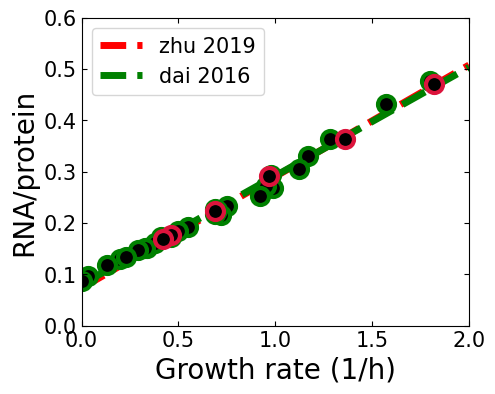

In [4]:
dai = pd.read_csv('data/dai2016rna.txt') #got this with webplotdigitizer
fig, ax1 = plt.subplots(figsize=(figw/2, figh))
plt.scatter(dai['Growth rate (1/h)'], dai['RNA/Protein'], color='black', s=150, edgecolor='green', linewidth=3,zorder=1)
plt.scatter(zhu_wt['Growth Rate'], zhu_wt['RNA/prot'], color='black', s=150, edgecolor='crimson', linewidth=3,zorder=1)
x=np.array(dai['Growth rate (1/h)']).reshape(-1,1)
y=dai['RNA/Protein']
daifit = LinearRegression(fit_intercept=True)
daifit.fit(x,y)
# Extract the coefficients
q_dai, m_dai = daifit.intercept_, daifit.coef_[0]
l=np.linspace(0,2,100)
plt.plot(l, inter_zhu+slope_zhu*l, label='zhu 2019', linestyle='--', linewidth=5, zorder=-1, color='red')
plt.plot(l, q_dai+m_dai*l, label='dai 2016', color='green', linestyle='--', linewidth=5, zorder=-1)
plt.xlim(0,2)
ax1.set_xlim(0,2)
ax1.set_ylim(0,0.6)
plt.ylabel('RNA/protein', fontsize=font)
plt.xlabel('Growth rate (1/h)', fontsize=font)
plt.tick_params(labelsize=label, axis='both', top=True, right=True, direction='in')
plt.legend(fontsize=15)

### Zhu2019 and Dai2016 growth laws are highly compatible.

In [5]:
def phir_dai(l):
    return (q_dai+m_dai*l)*0.76
def dai_gl(phir):
    return (phir/0.76-q_dai)/m_dai

### Load our ppGpp-growth rate data

In [6]:
milan_ppgpp_data = pd.read_csv('data/ppGppMeanAndError.csv')

In [7]:
#separates our growth rate data between wt/mutants and between different carbon sources
milan_ppgpp_data_wt=milan_ppgpp_data.loc[milan_ppgpp_data['Strain']=='WT']
milan_ppgpp_data_relA=milan_ppgpp_data.loc[milan_ppgpp_data['Strain']=='pTetRelA']
data_wt_glu=milan_ppgpp_data_wt.loc[milan_ppgpp_data_wt['Carbon Source']=='glucose']
data_wt_gly=milan_ppgpp_data_wt.loc[milan_ppgpp_data_wt['Carbon Source']=='glycerol']
data_wt_suc=milan_ppgpp_data_wt.loc[milan_ppgpp_data_wt['Carbon Source']=='succinate']
data_wt_ace=milan_ppgpp_data_wt.loc[milan_ppgpp_data_wt['Carbon Source']=='acetate']
data_wt_asp=milan_ppgpp_data_wt.loc[milan_ppgpp_data_wt['Carbon Source']=='aspartate']
data_wt_glt=milan_ppgpp_data_wt.loc[milan_ppgpp_data_wt['Carbon Source']=='glutamate']
data_relA_glu=milan_ppgpp_data_relA.loc[milan_ppgpp_data_relA['Carbon Source']=='glucose']
data_relA_gly=milan_ppgpp_data_relA.loc[milan_ppgpp_data_relA['Carbon Source']=='glycerol']
data_relA_suc=milan_ppgpp_data_relA.loc[milan_ppgpp_data_relA['Carbon Source']=='succinate']

**Compilation of RelA overexpression data from other studies**

**showing the ppGpp-lambda divergence**

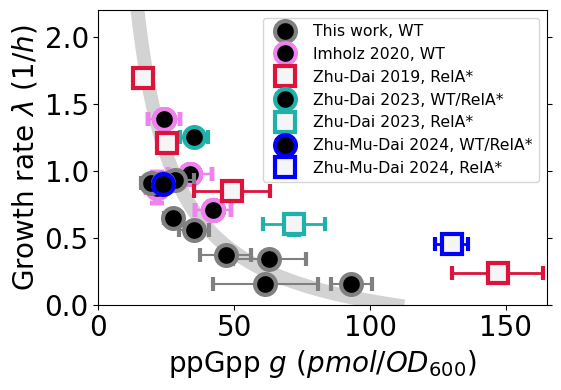

In [8]:
from scipy.optimize import curve_fit

x=milan_ppgpp_data_wt['Concentration']
y=milan_ppgpp_data_wt['Growth Rate']*slope_zhu/inter_zhu+1

model_lambda_g = LinearRegression(fit_intercept=False)
model_lambda_g.fit(x.values.reshape(-1, 1), 1/y.values.reshape(-1, 1), sample_weight=milan_ppgpp_data_wt['Concentration Error'])
g_null =1/model_lambda_g.coef_[0]
g_array=np.linspace(10,110,100)
predicted_gr = (1/(model_lambda_g.predict(g_array.reshape(-1, 1)))-1)/slope_zhu*inter_zhu
fig, ax1 = plt.subplots(1,1,figsize=(figw/1.75, figh))

ax1.plot(g_array, predicted_gr, linestyle='-', linewidth=10, color='lightgrey', zorder=-1)
for idx, row in milan_ppgpp_data_wt.iterrows():
    if(idx==0):
        ax1.errorbar(row['Concentration'], row['Growth Rate'],
                 xerr=row['Concentration Error'], yerr=row['Growth Rate Error'],
                   ecolor='grey', fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                   markeredgecolor='grey', markersize=15, markeredgewidth=3, zorder=1, capsize=cap, label='This work, WT')
    else:
        ax1.errorbar(row['Concentration'], row['Growth Rate'],
                 xerr=row['Concentration Error'], yerr=row['Growth Rate Error'],
                   ecolor='grey', fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                   markeredgecolor='grey', markersize=15, markeredgewidth=3, zorder=1, capsize=cap)

imholz = pd.read_excel('data/Imholz_2020_wt.XLSX', sheet_name=1)
summary_imholz = imholz.groupby("Medium").agg(
    mean_growth_rate=("Growth rate", "mean"),
    std_growth_rate=("Growth rate", "std"),
    mean_ppGpp=("ppGpp", "mean"),
    std_ppGpp=("ppGpp", "std")
).reset_index()

for idx, row in summary_imholz.iterrows():
    if(idx==0):
        ax1.errorbar(summary_imholz["mean_ppGpp"], summary_imholz["mean_growth_rate"],
             xerr=summary_imholz["std_ppGpp"], yerr=summary_imholz["std_growth_rate"],
             fmt='o', capsize=5, markersize=15, zorder=0, markeredgecolor='violet', markerfacecolor='black', 
             markeredgewidth=3, ecolor='violet', label='Imholz 2020, WT')
    else:
        ax1.errorbar(summary_imholz["mean_ppGpp"], summary_imholz["mean_growth_rate"],
             xerr=summary_imholz["std_ppGpp"], yerr=summary_imholz["std_growth_rate"],
             fmt='o', capsize=5, markersize=15, zorder=0, markeredgecolor='violet', markerfacecolor='black', 
             markeredgewidth=3, ecolor='violet')

zhu_ppgpp_data=pd.read_csv('data/zhudai_gr_ppgpp.txt')
zhu_ppgpp_data_lb = zhu_ppgpp_data.loc[zhu_ppgpp_data['medium']=='lb']
zhu_ppgpp_data_casaa = zhu_ppgpp_data.loc[zhu_ppgpp_data['medium']=='casaa']
zhu_ppgpp_data_glucose = zhu_ppgpp_data.loc[zhu_ppgpp_data['medium']=='glucose']
ax1.errorbar(zhu_ppgpp_data_lb['ppgpp concentration'],zhu_ppgpp_data_lb['growth rate'], xerr=zhu_ppgpp_data_lb['ppgpp error'], yerr=zhu_ppgpp_data_lb['growth rate error'], markeredgecolor='crimson', markerfacecolor=rela_face, markersize=15, marker='s', zorder=3, linewidth=2, markeredgewidth=3, fmt=' ', ecolor='crimson', capsize=5, label='Zhu-Dai 2019, RelA*')
ax1.errorbar(zhu_ppgpp_data_casaa['ppgpp concentration'][2],zhu_ppgpp_data_casaa['growth rate'][2],xerr=zhu_ppgpp_data_casaa['ppgpp error'][2], yerr=zhu_ppgpp_data_casaa['growth rate error'][2], markeredgecolor='lightseagreen', markerfacecolor=wt_face, markersize=15, marker='o', zorder=3, linewidth=2, markeredgewidth=3, fmt=' ', ecolor='lightseagreen', capsize=5, label='Zhu-Dai 2023, WT/RelA*')
ax1.errorbar(zhu_ppgpp_data_casaa['ppgpp concentration'][3],zhu_ppgpp_data_casaa['growth rate'][3],xerr=zhu_ppgpp_data_casaa['ppgpp error'][3], yerr=zhu_ppgpp_data_casaa['growth rate error'][3], markeredgecolor='lightseagreen', markerfacecolor=rela_face, markersize=15, marker='s', zorder=3, linewidth=2, markeredgewidth=3, fmt=' ', ecolor='lightseagreen', capsize=5, label='Zhu-Dai 2023, RelA*')
ax1.errorbar(zhu_ppgpp_data_glucose['ppgpp concentration'][0],zhu_ppgpp_data_glucose['growth rate'][0],xerr=zhu_ppgpp_data_glucose['ppgpp error'][0], yerr=zhu_ppgpp_data_glucose['growth rate error'][0], markeredgecolor='blue', markerfacecolor=wt_face, markersize=15, marker='o', zorder=3, linewidth=2, markeredgewidth=3, fmt=' ', ecolor='blue', capsize=5, label='Zhu-Mu-Dai 2024, WT/RelA*')
ax1.errorbar(zhu_ppgpp_data_glucose['ppgpp concentration'][1],zhu_ppgpp_data_glucose['growth rate'][1],xerr=zhu_ppgpp_data_glucose['ppgpp error'][1], yerr=zhu_ppgpp_data_glucose['growth rate error'][1], markeredgecolor='blue', markerfacecolor=rela_face, markersize=15, marker='s', zorder=3, linewidth=2, markeredgewidth=3, fmt=' ', ecolor='blue', capsize=5, label='Zhu-Mu-Dai 2024, RelA*')       
ax1.set_ylabel(r'Growth rate $\lambda \ (1/h)$', fontsize=font)
ax1.set_xlabel('ppGpp ' r'$ g \ (pmol/OD_{600})$', fontsize=font)
ax1.tick_params(labelsize=font)
ax1.set_xticks([0,50,100,150,200])
ax1.set_yticks([0,0.5,1,1.5,2])
ax1.xaxis.set_major_formatter(ScalarFormatter())
ax1.yaxis.set_ticks_position("both")
ax1.set_ylim(0,2.2)
ax1.set_xlim(0,165)
ax1.legend(fontsize=label*0.75)
plt.tight_layout()
# plt.savefig('images/zhu_and_milan_ppgpp_data_growth.svg')
plt.show()

### Load our cAMP-growth rate data

In [9]:
camp_data=pd.read_csv('data/cAMPMeanAndError.csv')
camp_data_wt=camp_data.loc[(camp_data['Strain']=='WT')]
camp_data_star=camp_data.loc[(camp_data['Strain']=='pTetRelA')]

camp_data_glu_wt=camp_data_wt.loc[camp_data_wt['Carbon Source']=='glucose']
camp_data_suc_wt=camp_data_wt.loc[camp_data_wt['Carbon Source']=='succinate']
camp_data_gly_wt=camp_data_wt.loc[camp_data_wt['Carbon Source']=='glycerol']

camp_data_glu_star=camp_data_star.loc[camp_data_star['Carbon Source']=='glucose']
camp_data_suc_star=camp_data_star.loc[camp_data_star['Carbon Source']=='succinate']
camp_data_gly_star=camp_data_star.loc[camp_data_star['Carbon Source']=='glycerol']

### Merge cAMP-growth rate dataset with ppGpp-growth rate dataset, finding common conditions

**Note that some conditions are not shared by both datasets (we have 5 extra ppGpp-growth rate points without cAMP measurements, and two extra cAMP-growth rate points without ppGpp measurements)**

**We filter those out in the merged dataset, but we show them in our plots when possible, as they follow the same trends of the points in the merged dataset**

In [10]:
common_pairs = pd.merge(milan_ppgpp_data, camp_data, on=['Carbon Source', 'Dox', 'Strain', 'Date Sampling'], how='inner', suffixes=('_x', '_y'))
row1=milan_ppgpp_data[(milan_ppgpp_data['Carbon Source']=='succinate')&(milan_ppgpp_data['Strain']=='WT')]
row2=camp_data[(camp_data['Carbon Source']=='succinate')&(camp_data['Strain']=='WT')].drop(['Date Sampling'], axis=1)
row_suc_wt=pd.merge(row1,row2, on=('Dox', 'Strain', 'Carbon Source'))
row_suc_wt = row_suc_wt.copy()  # Avoid modifying the original DataFrame
row_suc_wt.index = [31]  # Set index
common_pairs = pd.concat([common_pairs, row_suc_wt])
complete_merged=common_pairs.rename(columns={'Growth Rate_x' : 'mean_GR_x', 'Growth Rate Error_x' : 'err_GR_x', 'Concentration_x' : 'mean_ppgpp', 'Concentration Error_x' : 'err_ppgpp', 'Growth Rate_y' : 'mean_GR_y', 'Growth Rate Error_y' : 'err_GR_y', 'Concentration_y' : 'mean_camp', 'Concentration Error_y' : 'err_camp', 'Strain' : 'strain'})
merged_wt=complete_merged[complete_merged['strain']=='WT']
merged_rela=complete_merged[complete_merged['strain']=='pTetRelA']

In [11]:
complete_merged #dataset we use for data fitting. contains joint ppGpp and cAMP conditions

,mean_GR_x,err_GR_x,mean_ppgpp,err_ppgpp,strain,Carbon Source,Dox,Date Sampling,mean_GR_y,err_GR_y,mean_camp,err_camp
0,0.932697,0.000000,28.029890,7.166945,WT,glucose,0.00,20220222,0.932697,0.000000,1.778786,0.289129
1,0.907332,0.000000,19.245597,3.396529,WT,glucose,0.00,20220223,0.907332,0.000000,1.484733,0.088046
2,0.555879,0.000000,35.362053,5.538916,WT,glycerol,0.00,20220328,0.555879,0.000000,6.547888,0.201113
3,0.515821,0.000000,42.206403,5.669287,pTetRelA,glycerol,0.00,20220329,0.515821,0.000000,6.747955,0.120049
4,0.791281,0.000000,71.758422,7.189250,pTetRelA,glucose,0.20,20220426,0.791281,0.000000,1.831984,0.249613
5,0.543426,0.000000,45.364538,6.226826,pTetRelA,glycerol,0.00,20220429,0.543426,0.000000,8.400784,0.459051
6,0.391466,0.000000,111.913231,4.039325,pTetRelA,glycerol,0.20,20220504,0.391466,0.000000,7.053680,0.301821
7,0.456706,0.000000,96.601417,2.227872,pTetRelA,glycerol,0.20,20220510,0.456706,0.000000,9.280722,0.361553
8,0.288723,0.000000,250.802312,16.876408,pTetRelA,glycerol,0.40,20220511,0.288723,0.000000,7.919913,0.310419
9,0.329194,0.000000,119.981214,14.983019,pTetRelA,glycerol,0.30,20220513,0.329194,0.000000,12.937663,0.693414


### SI fig 1

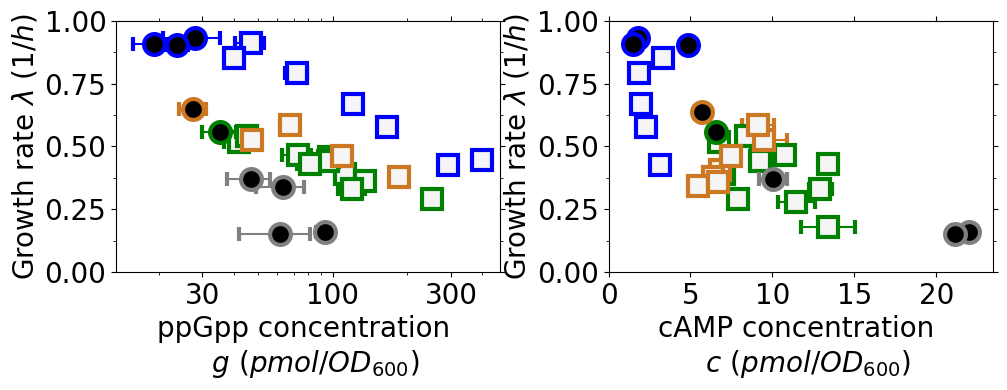

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(figw, figh))

for idx, row in milan_ppgpp_data_wt.iterrows():
    ax1.errorbar(row['Concentration'], row['Growth Rate'], 
                 xerr=row['Concentration Error'], yerr=row['Growth Rate Error'],
#                  label='WT' if idx == 1 else "", #add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15, markeredgewidth=3, zorder=1, capsize=cap)
for idx, row in milan_ppgpp_data_relA.iterrows():
    ax1.errorbar(row['Concentration'], row['Growth Rate'],
                 xerr=row['Concentration Error'], yerr=row['Growth Rate Error'],
#                  label='RelA' if idx == 0 else "",  
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=rela_marker, markerfacecolor=rela_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15, markeredgewidth=3, zorder=0, capsize=cap)



ax1.tick_params(labelsize=20)
ax1.set_ylabel(r'Growth rate $\lambda\ (1/h)$', fontsize=20)
ax1.set_xlabel('ppGpp concentration \n  $g\ (pmol/OD_{600})$ ', fontsize=20)
ax1.set_ylim(0,1)
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.yaxis.set_minor_locator(MultipleLocator(0.125))
ax1.xaxis.set_minor_locator(MultipleLocator(50))
ax1.set_xscale('log')
ax1.set_xticks([30,100,300])
ax1.xaxis.set_major_formatter(ScalarFormatter())

for idx, row in camp_data_wt.iterrows():
    ax2.errorbar(row['Concentration'], row['Growth Rate'],
                 yerr=row['Growth Rate Error'], xerr=row['Concentration Error'],
#                  label='WT' if idx == 1 else "", #add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15, markeredgewidth=3, zorder=1, capsize=cap)
for idx, row in camp_data_star.iterrows():
    ax2.errorbar(row['Concentration'], row['Growth Rate'],
                 yerr=row['Growth Rate Error'], xerr=row['Concentration Error'],
#                  label='RelA' if idx == 0 else "",  
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=rela_marker, markerfacecolor=rela_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15, markeredgewidth=3, zorder=0, capsize=cap)


ax2.tick_params(labelsize=20)
ax2.set_ylabel(r'Growth rate $\lambda\ (1/h)$', fontsize=20)
ax2.set_xlabel('cAMP concentration \n  $c\ (pmol/OD_{600})$ ', fontsize=20)
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.yaxis.set_minor_locator(MultipleLocator(0.125))
ax2.set_xticks([0,5,10,15,20])
#ax2.set_xlim(0,25)
ax2.set_ylim(0,1)
plt.tight_layout()
# plt.savefig('images/camp_ppgppp_lambda.pdf')
# plt.savefig('images/camp_ppgppp_lambda.svg')
plt.show()

### Below, we find the best linear (or quadratic fit) for cAMP as a function of ppGpp in the wild-type and under RelA overexpression (in this case, with different coeffs for each carbon source)

In [13]:
condition_glu = (complete_merged['Carbon Source'] == 'glucose')
condition_suc = (complete_merged['Carbon Source'] == 'succinate')
condition_gly = (complete_merged['Carbon Source'] == 'glycerol')

x=complete_merged['mean_ppgpp'][condition_glu]
y=complete_merged['mean_camp'][condition_glu]
model = LinearRegression(fit_intercept=True)
model.fit(x.values.reshape(-1, 1), y)
q_glu, m_glu = model.intercept_, model.coef_[0]

x=complete_merged['mean_ppgpp'][condition_suc]
y=complete_merged['mean_camp'][condition_suc]
model = LinearRegression(fit_intercept=True)
model.fit(x.values.reshape(-1, 1), y)
q_suc, m_suc = model.intercept_, model.coef_[0]

x=complete_merged['mean_ppgpp'][condition_gly]
y=complete_merged['mean_camp'][condition_gly]
model = LinearRegression(fit_intercept=True)
model.fit(x.values.reshape(-1, 1), y)
q_gly, m_gly = model.intercept_, model.coef_[0]

**the code below does the same, but forcing fitted line to pass through wt values for the three nutrients (SI fig3)**

In [14]:
condition_wt_glu = (complete_merged['strain'] == 'WT') & (complete_merged['Carbon Source'] == 'glucose')
condition_wt_suc = (complete_merged['strain'] == 'WT') & (complete_merged['Carbon Source'] == 'succinate')
condition_wt_gly = (complete_merged['strain'] == 'WT') & (complete_merged['Carbon Source'] == 'glycerol')
x_original = complete_merged['mean_ppgpp'][condition_glu]
y_original = complete_merged['mean_camp'][condition_glu]
x_p_glu_cnt = np.mean(complete_merged.loc[condition_wt_glu, 'mean_ppgpp'].values)
y_p_glu_cnt = np.mean(complete_merged.loc[condition_wt_glu, 'mean_camp'].values)  #when considering the three glucose wt point as separated
x_translated = x_original - x_p_glu_cnt
y_translated = y_original - y_p_glu_cnt
x = x_translated.values.reshape(-1, 1)
y = y_translated
model = LinearRegression(fit_intercept=False)  # No intercept since I want to force the line through the origin (translated point)
model.fit(x, y)
m_glu_cnt = model.coef_[0]
q_glu_cnt = y_p_glu_cnt - m_glu_cnt * x_p_glu_cnt

x_original = complete_merged['mean_ppgpp'][condition_suc]
y_original = complete_merged['mean_camp'][condition_suc]
x_p_suc_cnt = complete_merged.loc[condition_wt_suc, 'mean_ppgpp'].values[0]
y_p_suc_cnt = complete_merged.loc[condition_wt_suc, 'mean_camp'].values[0]
x_translated = x_original - x_p_suc_cnt
y_translated = y_original - y_p_suc_cnt
x = x_translated.values.reshape(-1, 1)
y = y_translated
model = LinearRegression(fit_intercept=False)  # No intercept since I want to force the line through the origin (translated point)
model.fit(x, y)
m_suc_cnt = model.coef_[0]
q_suc_cnt = y_p_suc_cnt - m_suc_cnt * x_p_suc_cnt

x_original = complete_merged['mean_ppgpp'][condition_gly]
y_original = complete_merged['mean_camp'][condition_gly]
x_p_gly_cnt = complete_merged.loc[condition_wt_gly, 'mean_ppgpp'].values[0]
y_p_gly_cnt = complete_merged.loc[condition_wt_gly, 'mean_camp'].values[0]
x_translated = x_original - x_p_gly_cnt
y_translated = y_original - y_p_gly_cnt
x = x_translated.values.reshape(-1, 1)
y = y_translated
model = LinearRegression(fit_intercept=False)  # No intercept since I want to force the line through the origin (translated point)
model.fit(x, y)
m_gly_cnt = model.coef_[0]
q_gly_cnt = y_p_gly_cnt - m_gly_cnt * x_p_gly_cnt

### Quadratic fit

In [15]:
from sklearn.preprocessing import PolynomialFeatures

condition_glu = (complete_merged['Carbon Source'] == 'glucose')
condition_suc = (complete_merged['Carbon Source'] == 'succinate')
condition_gly = (complete_merged['Carbon Source'] == 'glycerol')

x=complete_merged['mean_ppgpp'][condition_glu]
y=complete_merged['mean_camp'][condition_glu]
model = LinearRegression(fit_intercept=True)
model.fit(x.values.reshape(-1, 1), y)
q_glu, m_glu = model.intercept_, model.coef_[0]

poly = PolynomialFeatures(degree=2)


x = complete_merged['mean_ppgpp'][condition_suc].values.reshape(-1, 1)
y = complete_merged['mean_camp'][condition_suc].values
x_poly = poly.fit_transform(x)
model = LinearRegression(fit_intercept=True)
model.fit(x_poly, y)
coeffs_suc = model.coef_
intercept_suc = model.intercept_


x = complete_merged['mean_ppgpp'][condition_gly].values.reshape(-1, 1)
y = complete_merged['mean_camp'][condition_gly].values
x_poly = poly.fit_transform(x)
model = LinearRegression(fit_intercept=True)
model.fit(x_poly, y)
coeffs_gly = model.coef_
intercept_gly = model.intercept_

In [16]:
#preparatory to visualize the constrained cAMP-ppGpp fit under overexpression
from matplotlib.patches import FancyArrowPatch

g=np.linspace(0,300,100)

x_p_glu_cnt = np.mean(complete_merged.loc[condition_wt_glu, 'mean_ppgpp'].values)
y_p_glu_cnt = np.mean(complete_merged.loc[condition_wt_glu, 'mean_camp'].values)  #when considering the three glucose wt point as separated
x_p_suc_cnt = complete_merged.loc[condition_wt_suc, 'mean_ppgpp'].values[0]
y_p_suc_cnt = complete_merged.loc[condition_wt_suc, 'mean_camp'].values[0]
x_p_gly_cnt = complete_merged.loc[condition_wt_gly, 'mean_ppgpp'].values[0]
y_p_gly_cnt = complete_merged.loc[condition_wt_gly, 'mean_camp'].values[0]

x_camp=merged_wt['mean_ppgpp']
y_camp=merged_wt['mean_camp']
# Fit the model using scikit-learn
model = LinearRegression(fit_intercept=True)
model.fit(x_camp.values.reshape(-1, 1), y_camp)


q_wt, m_wt = model.intercept_, model.coef_[0]
lent=120
cnt_width=3

In [17]:
#preparatory to visualize cAMP ppGpp lines in a nice way

x_camp=merged_wt['mean_ppgpp']
y_camp=merged_wt['mean_camp']

model = LinearRegression(fit_intercept=True)
model.fit(x_camp.values.reshape(-1, 1), y_camp)

q_wt, m_wt = model.intercept_, model.coef_[0]

predictions = model.predict(x_camp.values.reshape(-1, 1))


g=np.linspace(0.01,315,1000)
y_wt=q_wt+m_wt*g
y_glu=q_glu+m_glu*g
y_gly=q_gly+m_gly*g
y_suc=q_suc+m_suc*g

# Find intersection points
def find_intersection(x, y1, y2):
    idx = np.argwhere(np.isclose(y1, y2, atol=0.1)).flatten()
    if len(idx) > 0:
        return max(x[idx]), max(y1[idx])
    return None, None

x_p_glu, y_p_glu = find_intersection(g, y_wt, y_glu)
x_p_gly, y_p_gly = find_intersection(g, y_wt, y_gly)
x_p_suc, y_p_suc = find_intersection(g, y_wt, y_suc)

In [18]:
g=np.linspace(0,300,100)

def draw_parabolic_arrow(ax, start, end, color='black', linewidth=2):
    """
    Draws a parabolic arrow from start to end on the given axis.

    Parameters:
    ax : matplotlib.axes.Axes
        The axis on which to draw the arrow.
    start : tuple
        The (x, y) starting point of the arrow.
    end : tuple
        The (x, y) ending point of the arrow.
    color : str
        Color of the arrow.
    linewidth : int
        Width of the arrow line.
    """
    x_start, y_start = start
    x_end, y_end = end

    # Generate points for a parabola
    num_points = 100
    x = np.linspace(x_start, x_end, num_points)
    a = (y_end - y_start) / ((x_end - x_start) ** 2)
    y = y_start + a * (x - x_start) ** 2

    # Create the path for the parabola
    vertices = np.vstack([x, y]).T
    codes = [1] + [2] * (num_points - 2) + [2]

    # Create the arrow patch
    arrow = FancyArrowPatch(
        posA=(x_start, y_start),
        posB=(x_end, y_end),
        path=vertices,
        arrowstyle='-|>',
        mutation_scale=20,
        color=color,
        linewidth=linewidth,
        linestyle='-'
    )

    ax.add_patch(arrow)


x_camp=merged_wt['mean_ppgpp']
y_camp=merged_wt['mean_camp']
# Fit the model using scikit-learn
model = LinearRegression(fit_intercept=True)
model.fit(x_camp.values.reshape(-1, 1), y_camp)



# Extract the coefficients
q_wt, m_wt = model.intercept_, model.coef_[0]
# Calculate predictions
predictions = model.predict(x_camp.values.reshape(-1, 1))


g=np.linspace(0.01,315,1000)
y_wt=q_wt+m_wt*g
quadratic_suc = intercept_suc + coeffs_suc[1] * g + coeffs_suc[2] * g**2
def quadratic_pred_suc(x):
    return intercept_suc + coeffs_suc[1] * x + coeffs_suc[2] * x**2
quadratic_gly =  intercept_gly + coeffs_gly[1] * g + coeffs_gly[2] * g**2
def quadratic_pred_gly(x):
    return intercept_gly + coeffs_gly[1] * x + coeffs_gly[2] * x**2

# Find intersection points
def find_intersection(x, y1, y2):
    idx = np.argwhere(np.isclose(y1, y2, atol=0.1)).flatten()
    if len(idx) > 0:
        return max(x[idx]), max(y1[idx])
    return None, None

x_p_glu, y_p_glu = find_intersection(g, y_wt, y_glu)
x_p_gly_quad, y_p_gly_quad = find_intersection(g, y_wt, quadratic_gly)
x_p_suc_quad, y_p_suc_quad = find_intersection(g, y_wt, quadratic_suc)

**Figure 2C: cAMP and ppGpp are correlated under catabolic limitation**

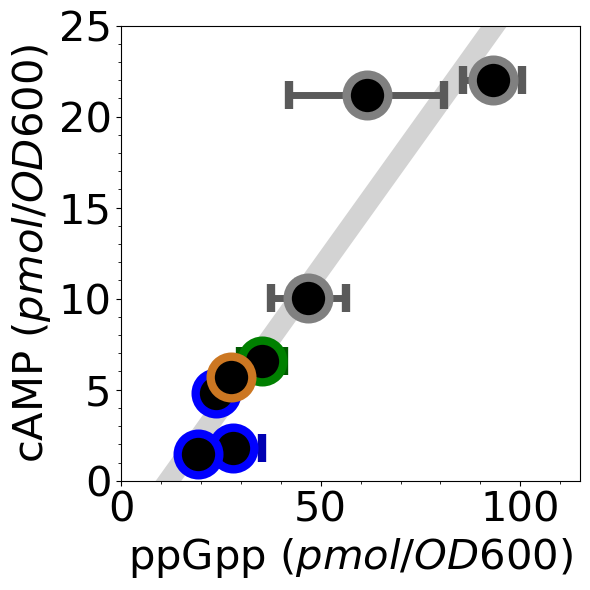

In [19]:
plt.figure(figsize=(6, 6))
g=np.linspace(0,300,100)
x_camp=merged_wt['mean_ppgpp']
y_camp=merged_wt['mean_camp']

# Fit the model using scikit-learn
model = LinearRegression(fit_intercept=True)
model.fit(x_camp.values.reshape(-1, 1), y_camp)

# Extract the coefficients
q_wt, m_wt = model.intercept_, model.coef_[0]

# Calculate predictions
predictions = model.predict(x_camp.values.reshape(-1, 1))

plt.plot(g, q_wt + m_wt * g, color='lightgrey', linewidth=15, zorder=-1)
for idx, row in merged_wt.iterrows():
    plt.errorbar(row['mean_ppgpp'], row['mean_camp'],
                 xerr=row['err_ppgpp'], yerr=row['err_camp'],
                 #label='WT' if idx == 1 else "", #add label once
                 fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=30, markeredgewidth=6,
                 capsize=2*cap, elinewidth=eline,
                 ecolor=darken_color(color_dict[row['Carbon Source']]), zorder=idx)
plt.xlabel('ppGpp $(pmol/OD600)$', fontsize=1.5*font)
plt.ylabel('cAMP $(pmol/OD600)$', fontsize=1.5*font)
plt.tick_params(labelsize=2*label, axis='both')
plt.ylim(0,25)
plt.xlim(0,115)
ax=plt.gca()
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_major_locator(MultipleLocator(50))
plt.tight_layout()
# plt.savefig('images/camp-ppgpp_wt.pdf')
# plt.savefig('images/camp-ppgpp_wt.svg')
plt.show()


**We define $\phi_{max}$ and $\phi_Q$**

In [20]:
phi_max=0.45
phi_q=1-phi_max

***Here we use the RNA/prot growth law in Zhu2019 to convert our growth rate data***

In [21]:
def zhu_fit(x):
    return x*slope_zhu+inter_zhu   #this function computes RNA/protein ratio from growth rate according to Zhu 2019
#Neglect the error arising from the fit (it is small compared to the experimental one)
def phir(l):
    return 0.76*zhu_fit(l)   #gets the ribosomal fraction from the growth rate (using conversion factor in scott2010)

**We plot the resulting ribosomal fractions against ppGpp as in Fig 2B**

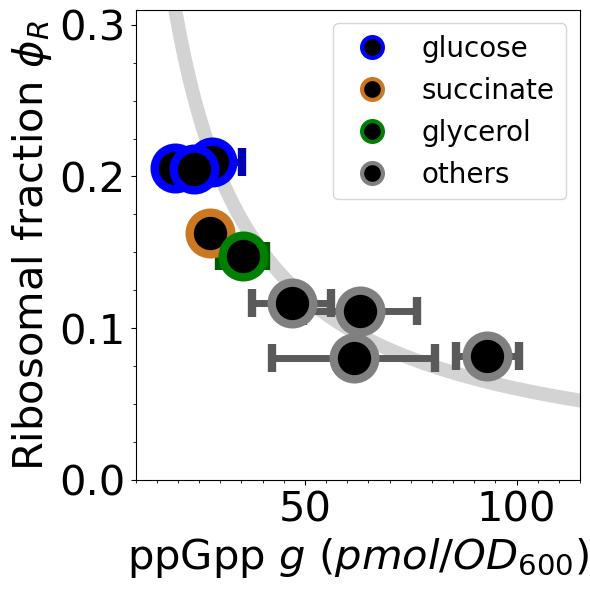

In [22]:
plt.figure(figsize=(6, 6))
g=np.linspace(10,115,100)

x=merged_wt['mean_ppgpp']
y=1/phir(merged_wt['mean_GR_x'])
model_wu2022 = LinearRegression(fit_intercept=False)
model_wu2022.fit(1/x.values.reshape(-1, 1), 1/y)

model = LinearRegression(fit_intercept=False)   #to find the value of g_0 according to Wu2022 expression
model.fit(x.values.reshape(-1, 1), y)
intercept, slope = model.intercept_, model.coef_[0]
g_0=1/((inter_zhu*0.76)*slope)



intercept, slope = model.intercept_, model.coef_[0]


predictions = model.predict(x.values.reshape(-1, 1))


plt.plot(g, 1/(intercept+slope*g), color='lightgrey', linewidth=10, zorder=-1)

for idx, row in milan_ppgpp_data_wt.iterrows():
    plt.errorbar(row['Concentration'], phir(row['Growth Rate']),
                 xerr=row['Concentration Error'], yerr=0.76*slope_zhu*row['Growth Rate Error'],
                 ecolor=darken_color(color_dict[row['Carbon Source']], 0.3), fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=2*15, markeredgewidth=2*3, zorder=0,
                 capsize=2*cap, elinewidth=eline, barsabove=False)
plt.xlabel('ppGpp ' r'$ g\ (pmol/OD_{600})$', fontsize=1.5*font)
plt.ylabel('Ribosomal fraction $\phi_R$', fontsize=1.5*font)
plt.tick_params(axis='both', which='both', labelsize=2*label)
plt.ylim(0,0.31)
plt.xlim(10,115)
ax=plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
ax.yaxis.set_major_locator(MultipleLocator(0.1))

from matplotlib.lines import Line2D
handles= [Line2D([0], [0], marker='o', color='w', label='glucose',
                          markerfacecolor=wt_face, markeredgecolor=color_dict['glucose'], markersize=15, markeredgewidth=3),
          Line2D([0], [0], marker='o', color='w', label='succinate',
                          markerfacecolor=wt_face, markeredgecolor=color_dict['succinate'], markersize=15, markeredgewidth=3),
          Line2D([0], [0], marker='o', color='w', label='glycerol',
                          markerfacecolor=wt_face, markeredgecolor=color_dict['glycerol'], markersize=15, markeredgewidth=3),
          Line2D([0], [0], marker='o', color='w', label='others',
                          markerfacecolor=wt_face, markeredgecolor=color_dict['acetate'], markersize=15, markeredgewidth=3)]
plt.legend(handles=handles, fontsize=font)
plt.tight_layout()
# plt.savefig('images/ppGpp_phir_milan_ppgpp_data_wt.pdf')
# plt.savefig('images/ppGpp_phir_milan_ppgpp_data_wt.svg')
plt.show()

### We use transcriptomics and proteomics to find average length and chromosomal location for each sector

### Below, the code to assign proteins to sectors according to Mori et al. 2021.

In [23]:
# data_mori = pd.read_excel('data/mori_data.xlsx', sheet_name = 'EV9-AbsoluteMassFractions-2')
# legend_mori = pd.read_excel('data/mori_legend.xlsx', sheet_name = 'EV3-Samples-2')
# legend_mori['Group'] = legend_mori['Group'].fillna(method='ffill')
# legend_mori=legend_mori.iloc()[:,:3]

# c_filter=['Gene name', 'Gene locus', 'Protein ID', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'D6', 'D7', 'D8', 'F4', 'F5', 'F6', 'F7', 'F8']
# a_filter=['Gene name', 'Gene locus', 'Protein ID', 'D1','D2','D3','D4','D5','F2','F3']
# r_filter=['Gene name', 'Gene locus', 'Protein ID', 'A2', 'H1','H5','E1','E2','E3','E4']

# legendc = legend_mori[legend_mori['Group'] == 'C-limitation']
# legenda = legend_mori[legend_mori['Group'] == 'A-limitation']
# legendr = legend_mori[legend_mori['Group'] == 'R-limitation']

# moric=data_mori[c_filter]
# moria=data_mori[a_filter]
# morir=data_mori[r_filter]
# moric.insert(loc=18,column='intercept', value=None)
# moric.insert(loc=19,column='slope', value=None)
# moria.insert(loc=10,column='intercept', value=None)
# moria.insert(loc=11,column='slope', value=None)
# morir.insert(loc=10,column='intercept', value=None)
# morir.insert(loc=11,column='slope', value=None)

# data_mori.insert(loc=39,column='Ctrend', value=None)
# data_mori.insert(loc=40,column='Atrend', value=None)
# data_mori.insert(loc=41,column='Rtrend', value=None)

# ID_index = moric.columns.get_loc('Protein ID')
# ccols = moric.loc[:, 'C2':'F8'].columns
# acols = moria.loc[:, 'D1':'F3'].columns
# rcols = morir.loc[:, 'A2':'E4'].columns
# for name in moric['Gene name']:
#     sector_regression = LinearRegression()
#     fractions= moric.loc[moric['Gene name'] == name, ccols]
#     gr=legendc['Growth rate (1/h)']
#     fractions=fractions.values
#     gr=gr.values
#     gr=gr.reshape(-1,1)
#     fractions=fractions.reshape(-1,1)
#     sector_regression.fit(gr,fractions)
#     m=sector_regression.coef_[0][0]
#     q=sector_regression.intercept_[0]
#     moric.loc[moric['Gene name'] == name,'slope']=m
#     moric.loc[moric['Gene name'] == name,'intercept']=q
#     if(m>0):
#         data_mori.loc[data_mori['Gene name']==name, 'Ctrend']='down'
#     if(m<0):
#         data_mori.loc[data_mori['Gene name']==name, 'Ctrend']='up'
# #     if(m==0):
# #         data_mori.loc[data_mori['Gene name']==name, 'Ctrend']='0'
# for name in moria['Gene name']:
#     sector_regression = LinearRegression()
#     fractions= moria.loc[moria['Gene name'] == name, acols]
#     gr=legenda['Growth rate (1/h)']
#     fractions=fractions.values
#     fractions=fractions.reshape(-1,1)
#     gr=gr.values
#     gr =gr.reshape(-1,1)
#     sector_regression.fit(gr,fractions)
#     m=sector_regression.coef_[0][0]
#     q=sector_regression.intercept_[0]
#     moria.loc[moria['Gene name'] == name,'slope']=m
#     moria.loc[moria['Gene name'] == name,'intercept']=q
#     if(m>0):
#         data_mori.loc[data_mori['Gene name']==name, 'Atrend']='down'
#     if(m<0):
#         data_mori.loc[data_mori['Gene name']==name, 'Atrend']='up'
# #     if(m==0):
# #         data_mori.loc[data_mori['Gene name']==name, 'Atrend']='0'
# for name in morir['Gene name']:
#     sector_regression = LinearRegression()
#     fractions= morir.loc[morir['Gene name'] == name, rcols]
#     gr=legendr['Growth rate (1/h)']
#     fractions=fractions.values
#     gr=gr.values
#     fractions=fractions.reshape(-1,1)
#     gr= gr.reshape(-1,1)
#     sector_regression.fit(gr,fractions)
#     m=sector_regression.coef_[0][0]
#     q=sector_regression.intercept_[0]
#     morir.loc[morir['Gene name'] == name,'slope']=m
#     morir.loc[morir['Gene name'] == name,'intercept']=q
#     if(m>0):
#         data_mori.loc[data_mori['Gene name']==name, 'Rtrend']='down'
#     if(m<0):
#         data_mori.loc[data_mori['Gene name']==name, 'Rtrend']='up'
# #     if(m==0):
# #         data_mori.loc[data_mori['Gene name']==name, 'Rtrend']='0'

# def classify_group(row):
#     trend_combination = (row['Ctrend'], row['Atrend'], row['Rtrend'])

#     if trend_combination == ('up', 'up', 'up'):
#         return "S'"
#     elif trend_combination == ('up', 'up', 'down'):
#         return 'S'
#     elif trend_combination == ('up', 'down', 'up'):
#         return "C'"
#     elif trend_combination == ('up', 'down', 'down'):
#         return 'C'
#     elif trend_combination == ('down', 'up', 'up'):
#         return "A'"
#     elif trend_combination == ('down', 'up', 'down'):
#         return 'A'
#     elif trend_combination == ('down', 'down', 'up'):
#         return 'R'
#     elif trend_combination == ('down', 'down', 'down'):
#         return 'U'
#     else:
#         return 'No sector'
# data_mori['group'] = data_mori.apply(classify_group, axis=1)
# data_mori.to_csv('mori_groups.csv', index=False)

### We provide the file mori_groups with assignments to speed up the notebook

In [24]:
data_mori = pd.read_csv('data/mori_groups.csv')
legend_mori = pd.read_excel('data/mori_legend.xlsx', sheet_name = 'EV3-Samples-2')
legend_mori['Group'] = legend_mori['Group'].fillna(method='ffill')
legend_mori=legend_mori.iloc()[:,:3]

#columns corresponding to different limitations
c_filter=['Gene name', 'Gene locus', 'Protein ID', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'D6', 'D7', 'D8', 'F4', 'F5', 'F6', 'F7', 'F8']
a_filter=['Gene name', 'Gene locus', 'Protein ID', 'D1','D2','D3','D4','D5','F2','F3']
r_filter=['Gene name', 'Gene locus', 'Protein ID', 'A2', 'H1','H5','E1','E2','E3','E4'] 


legendc = legend_mori[legend_mori['Group'] == 'C-limitation']
legenda = legend_mori[legend_mori['Group'] == 'A-limitation']
legendr = legend_mori[legend_mori['Group'] == 'R-limitation']

moric=data_mori[c_filter]
moria=data_mori[a_filter]
morir=data_mori[r_filter]

ccols = moric.loc[:, 'C2':'F8'].columns
acols = moria.loc[:, 'D1':'F3'].columns
rcols = morir.loc[:, 'A2':'E4'].columns

In [25]:
sectors = {}
for group_name in data_mori['group'].unique():
    group_df = data_mori[data_mori['group'] == group_name][['Gene name']]
    sectors[group_name] = group_df

### Load the list of ribosomal proteins from Dai et al. 2016

In [26]:
list_ribo=pd.read_excel('data/41564_2017_BFnmicrobiol2016231_MOESM55_ESM.xlsx', header=1, sheet_name=1)
names_ribo=list_ribo['r-protein']

data_mori.loc[data_mori['Gene name'].isin(names_ribo), 'group'] = 'ribo'

### Below, we extract targets of cAMP and ppGpp from datasets in Ecocyc and RegulonDB

In [27]:
import re
import csv

def extract_genes(input_file, output_file):
    """
    Extracts gene names, their corresponding signs, and gene loci from a large file and writes them to a CSV,
    skipping the first line of the file.

    Args:
        input_file (str): Path to the input file.
        output_file (str): Path to the output CSV file.
    """
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        csv_writer = csv.writer(outfile)
        csv_writer.writerow(["Gene", "Sign", "locus"])  # Write header

        for line_number, line in enumerate(infile):
            if line_number == 0:  # Skip the first line
                continue

            parts = line.strip().split("\t")
            if len(parts) < 5:  # Skip lines that don't have enough columns
                continue

            sign = parts[2]
            genes = re.split(r" // ", parts[3])  # Split the genes column by " // "
            loci = re.split(r" // ", parts[4])  # Split the locus column by " // "

            # Match genes with their corresponding loci
            for gene, locus in zip(genes, loci):
                csv_writer.writerow([gene, sign, locus])  # Write each gene, its sign, and locus to the file

# Example usage:
# extract_genes("input_file.txt", "output_file.csv")


In [28]:
extract_genes("data/Regulated-By-from-All-promoters-of-E.-coli-K-12-substr.-MG1655.txt", "data/all_regulatees.csv")
extract_genes("data/crp_regulatees_non_imputed.txt", "data/crp_regulatees.csv")
extract_genes("data/ppgpp_regulatees_non_imputed.txt", "data/ppgpp_regulatees.csv")
### non imputed files were downloaded directly from Ecocyc

In [29]:
merge_string_left='Gene'
merge_string_right='Gene name'

In [30]:
crp_targets=pd.read_csv('data/crp_regulatees.csv')
crp_targets=crp_targets.drop_duplicates(keep='first')
crp_activated=crp_targets.loc[crp_targets['Sign']=='+']
crp_repressed=crp_targets.loc[crp_targets['Sign']=='-']

temp=crp_activated

# # # Eliminate genes for which the mode of regulation is ambiguous from both crp_activated and crp_repressed
crp_activated = crp_activated[~crp_activated['Gene'].isin(crp_repressed['Gene'])]
crp_repressed = crp_repressed[~crp_repressed['Gene'].isin(temp['Gene'])]

### Distribution of cAMP activated genes across proteome sectors

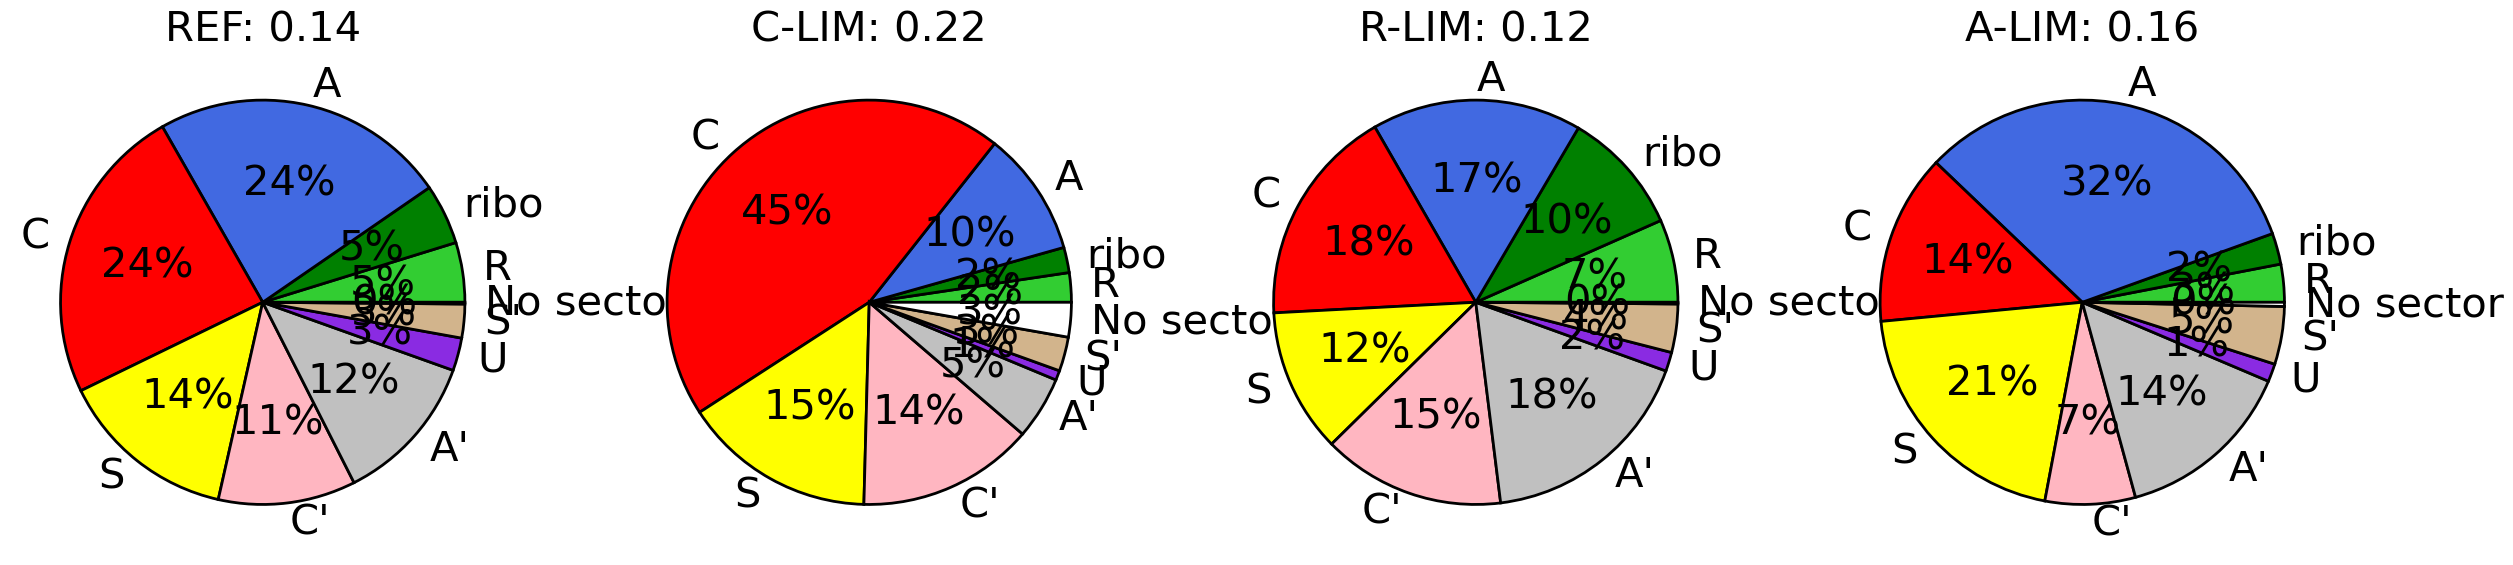

In [31]:
#clean the list from non-protein targets (which are not in Mori 2021 dataset)
merged_crp_activated=pd.merge(crp_activated, data_mori, left_on=merge_string_left, right_on=merge_string_right)
merged_crp_activated
sector_weighted_ref = merged_crp_activated.groupby('group')['C2'].sum()
sector_weighted_clim = merged_crp_activated.groupby('group')['C7'].sum()
sector_weighted_rlim = merged_crp_activated.groupby('group')['E4'].sum()
sector_weighted_alim = merged_crp_activated.groupby('group')['D1'].sum()

group_colors = {
    "R": "limegreen", 
    "ribo": 'green',
    "A": "royalblue",  
    "C": "red", 
    "S": "yellow",
    "C'": "lightpink", 
    "A'": "silver",  
    "U": "blueviolet", 
    "S'": "tan",
    "No sector": "white"
}



sector_weighted_list = [
    pd.Series(sector_weighted_ref),
    pd.Series(sector_weighted_clim),
    pd.Series(sector_weighted_rlim),
    pd.Series(sector_weighted_alim),
]

title_list= ['REF:', 'C-LIM:', 'R-LIM:', 'A-LIM:' 
]

mass_fraction_list= [
    sector_weighted_ref.sum(),
    sector_weighted_clim.sum(),
    sector_weighted_rlim.sum(),
    sector_weighted_alim.sum(),  
]


fig, axes = plt.subplots(1, 4, figsize=(3*figw, 4*figh))

custom_order = ["R", "ribo", "A", "C", "S", "C'", "A'", "U", "S'", "No sector"]

for i, (sector_weighted, title, mass_fraction, ax) in enumerate(zip(sector_weighted_list, title_list, mass_fraction_list, axes)):
    sector_weighted = sector_weighted.reindex(custom_order)
    colors = [group_colors[group] for group in sector_weighted.index]  # Get correct colors
    sector_weighted.plot(kind='pie', autopct='%1.0f%%', fontsize=font*1.5, colors=colors, ax=ax, wedgeprops={'edgecolor': 'black', 'linewidth': 2})  
    ax.set_ylabel("")  # Remove y-axis label
    ax.set_title(f"{title} {mass_fraction:.2f}", fontsize=font*1.5)


#plt.text(2, 0.5, my_variable, fontsize=12, color='black', ha='center', va='center')
# plt.savefig('images/camp_activated_map.svg')

### We can do the same for cAMP repressed genes  (not in the paper)

Text(2, 0.5, 'Total Sum: 0.03583761863')

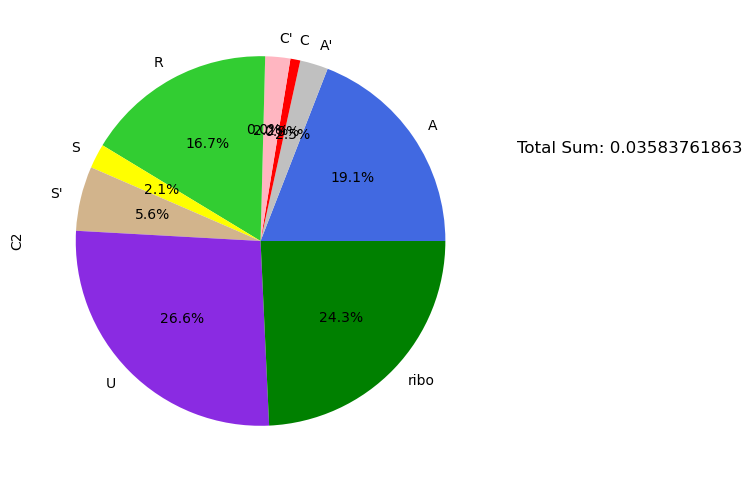

In [32]:
merged_crp_repressed=pd.merge(crp_repressed, data_mori, left_on=merge_string_left, right_on=merge_string_right)
sector_weighted = merged_crp_repressed.groupby('group')['C2'].sum()
colors = [group_colors[group] for group in sector_weighted.index]  # Get correct colors
sector_weighted.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), legend=False, colors=colors)

my_variable = "Total Sum: " + str(sector_weighted.sum())
plt.text(2, 0.5, my_variable, fontsize=12, color='black', ha='center', va='center')

### We repeat the same procedure for ppGpp targets

In [33]:
ppgpp_targets=pd.read_csv('data/ppgpp_regulatees.csv')
ppgpp_targets=ppgpp_targets.drop_duplicates(keep='first')
ppgpp_activated=ppgpp_targets.loc[ppgpp_targets['Sign']=='+']
ppgpp_repressed=ppgpp_targets.loc[ppgpp_targets['Sign']=='-']

temp=ppgpp_activated

ppgpp_activated = ppgpp_activated[~ppgpp_activated['Gene'].isin(ppgpp_repressed['Gene'])]
ppgpp_repressed = ppgpp_repressed[~ppgpp_repressed['Gene'].isin(temp['Gene'])]

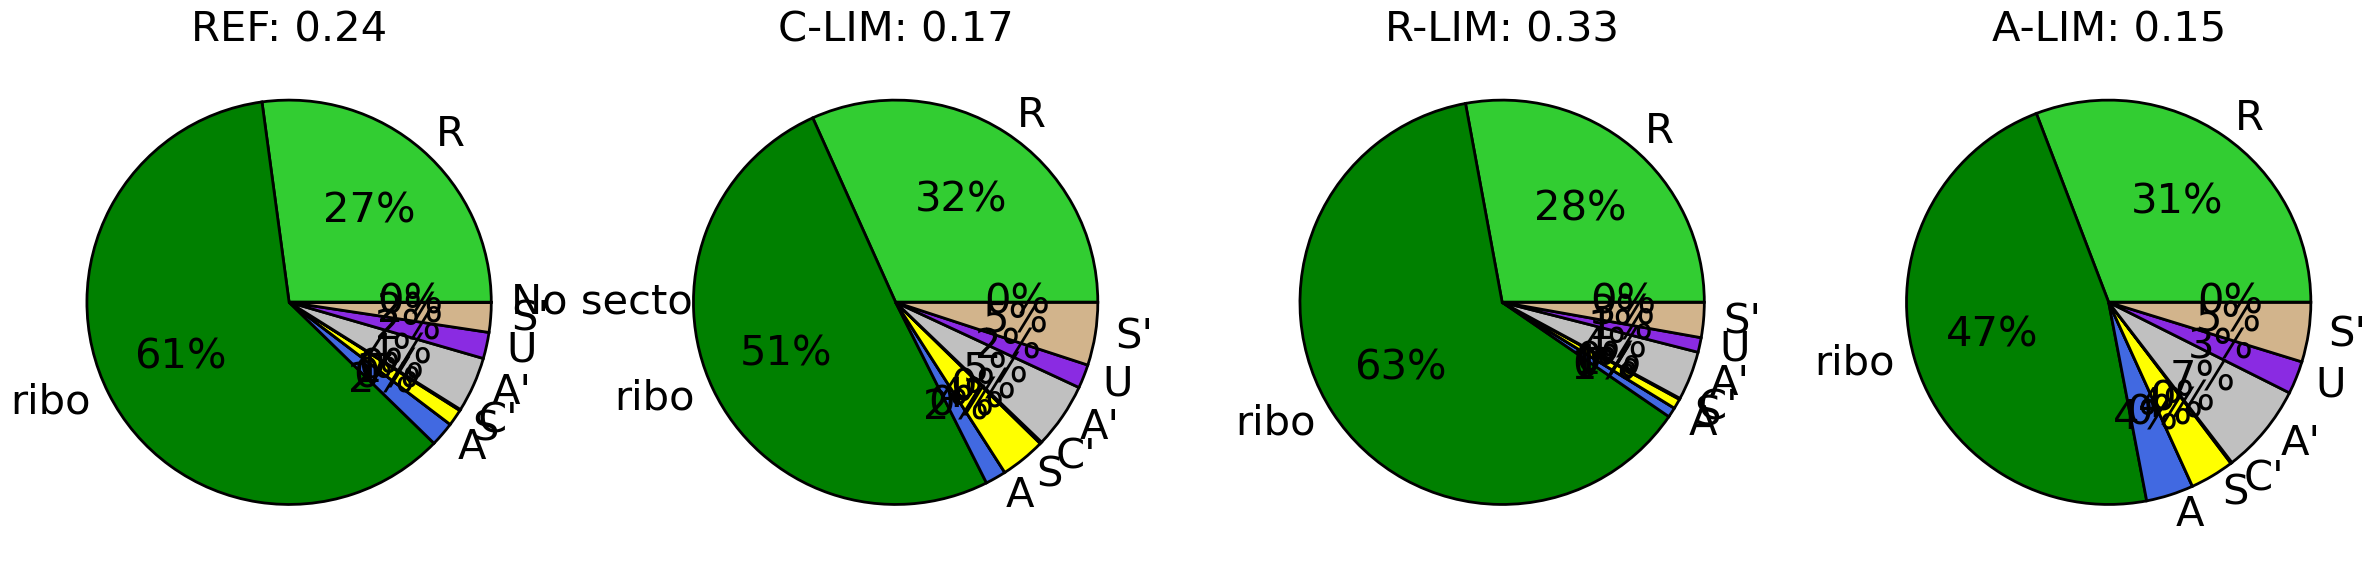

In [34]:
merged_ppgpp_repressed=pd.merge(ppgpp_repressed, data_mori, left_on=merge_string_left, right_on=merge_string_right)
merged_ppgpp_repressed
sector_weighted_ref = merged_ppgpp_repressed.groupby('group')['C2'].sum()
sector_weighted_clim = merged_ppgpp_repressed.groupby('group')['C7'].sum()
sector_weighted_rlim = merged_ppgpp_repressed.groupby('group')['E4'].sum()
sector_weighted_alim = merged_ppgpp_repressed.groupby('group')['D1'].sum()

sector_weighted_list = [
    pd.Series(sector_weighted_ref),
    pd.Series(sector_weighted_clim),
    pd.Series(sector_weighted_rlim),
    pd.Series(sector_weighted_alim),
]

title_list= ['REF:', 'C-LIM:', 'R-LIM:', 'A-LIM:' 
]

mass_fraction_list= [
    sector_weighted_ref.sum(),
    sector_weighted_clim.sum(),
    sector_weighted_rlim.sum(),
    sector_weighted_alim.sum(),  
]


fig, axes = plt.subplots(1, 4, figsize=(3*figw, 4*figh))
custom_order = ["R", "ribo", "A", "C", "S", "C'", "A'", "U", "S'", "No sector"]

for i, (sector_weighted, title, mass_fraction, ax) in enumerate(zip(sector_weighted_list, title_list, mass_fraction_list, axes)):
    sector_weighted = sector_weighted.reindex(custom_order)
    colors = [group_colors[group] for group in sector_weighted.index]  # Get correct colors
    sector_weighted.plot(kind='pie', autopct='%1.0f%%', fontsize=font*1.5, colors=colors, ax=ax, wedgeprops={'edgecolor': 'black', 'linewidth': 2})  
    ax.set_ylabel("")  # Remove y-axis label
    ax.set_title(f"{title} {mass_fraction:.2f}", fontsize=font*1.5)


# plt.savefig('images/ppgpp_repressed.svg')

### We do the same for ppGpp activated genes (not in the paper)

Text(2, 0.5, 'Total Sum: 0.03374347071')

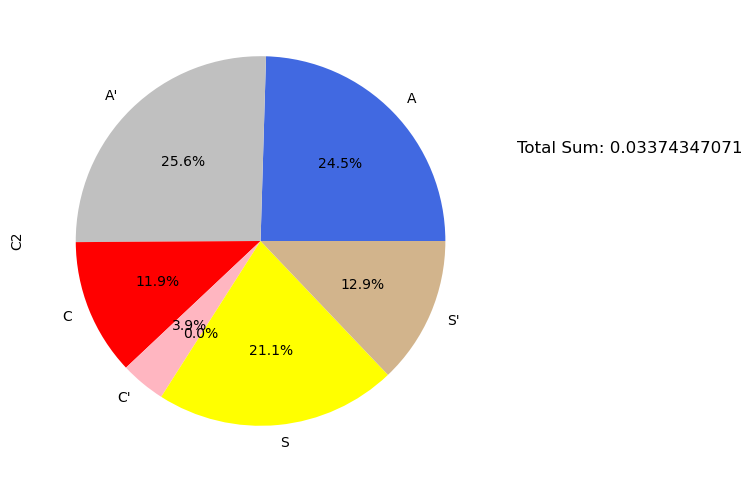

In [35]:
merged_ppgpp_activated=pd.merge(ppgpp_activated, data_mori, left_on=merge_string_left, right_on=merge_string_right)
merged_ppgpp_activated
sector_weighted = merged_ppgpp_activated.groupby('group')['C2'].sum()
colors = [group_colors[group] for group in sector_weighted.index]  # Get correct colors
sector_weighted.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), legend=False, colors=colors)

my_variable = "Total Sum: " + str(sector_weighted.sum())
plt.text(2, 0.5, my_variable, fontsize=12, color='black', ha='center', va='center')

## If you want to use RegulonDB (gives the same results)

### cAMP regulon

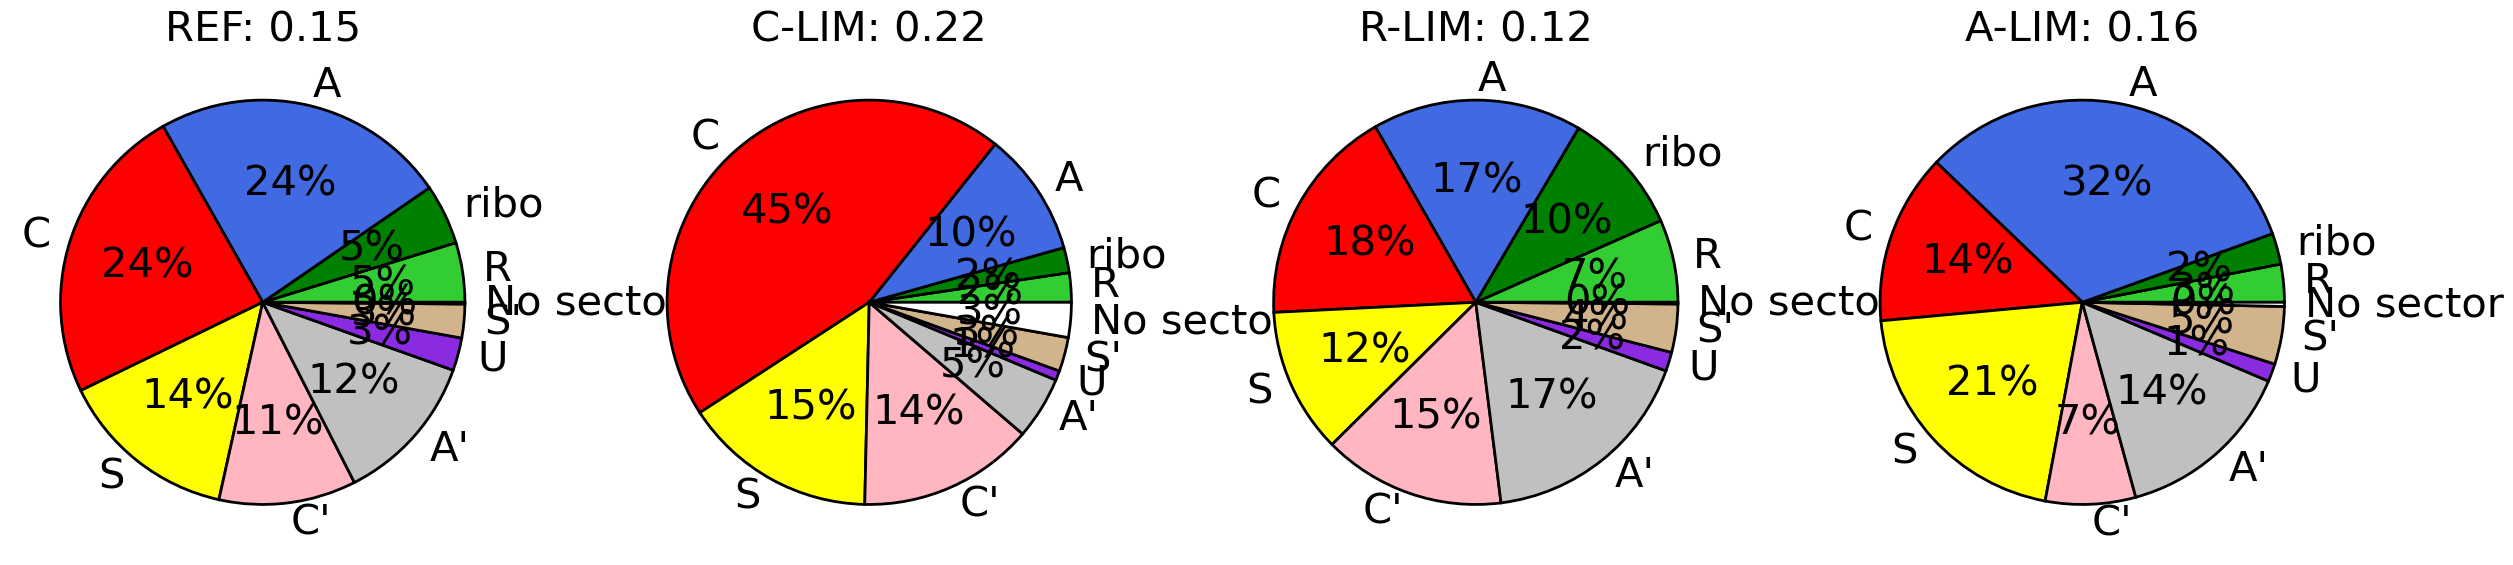

In [36]:
camp_regulon = []
with open("data/cAMP_regulondb.csv", "r") as file:  #this file containes both cAMP activated and cAMP repressed genes
    next(file)  # Skip header
    for line in file:
        gene_name = line.split(",")[0]  # Get the first value (gene name)
        if line.split(",")[1] == 'activator':
            camp_regulon.append(gene_name)
            
            
merged_camp_regulon=data_mori.loc[data_mori['Gene name'].isin(camp_regulon)]
merged_camp_regulon
sector_weighted_ref = merged_camp_regulon.groupby('group')['C2'].sum()
sector_weighted_clim = merged_camp_regulon.groupby('group')['C7'].sum()
sector_weighted_rlim = merged_camp_regulon.groupby('group')['E4'].sum()
sector_weighted_alim = merged_camp_regulon.groupby('group')['D1'].sum()


sector_weighted_list = [
    pd.Series(sector_weighted_ref),
    pd.Series(sector_weighted_clim),
    pd.Series(sector_weighted_rlim),
    pd.Series(sector_weighted_alim),
]

title_list= ['REF:', 'C-LIM:', 'R-LIM:', 'A-LIM:' 
]

mass_fraction_list= [
    sector_weighted_ref.sum(),
    sector_weighted_clim.sum(),
    sector_weighted_rlim.sum(),
    sector_weighted_alim.sum(),  
]


fig, axes = plt.subplots(1, 4, figsize=(3*figw, 4*figh))
custom_order = ["R", "ribo", "A", "C", "S", "C'", "A'", "U", "S'", "No sector"]

for i, (sector_weighted, title, mass_fraction, ax) in enumerate(zip(sector_weighted_list, title_list, mass_fraction_list, axes)):
    sector_weighted = sector_weighted.reindex(custom_order)
    colors = [group_colors[group] for group in sector_weighted.index]  # Get correct colors
    sector_weighted.plot(kind='pie', autopct='%1.0f%%', fontsize=font*1.5, colors=colors, ax=ax, wedgeprops={'edgecolor': 'black', 'linewidth': 2})  
    ax.set_ylabel("")  # Remove y-axis label
    ax.set_title(f"{title} {mass_fraction:.2f}", fontsize=font*1.5)


### ppGpp regulon

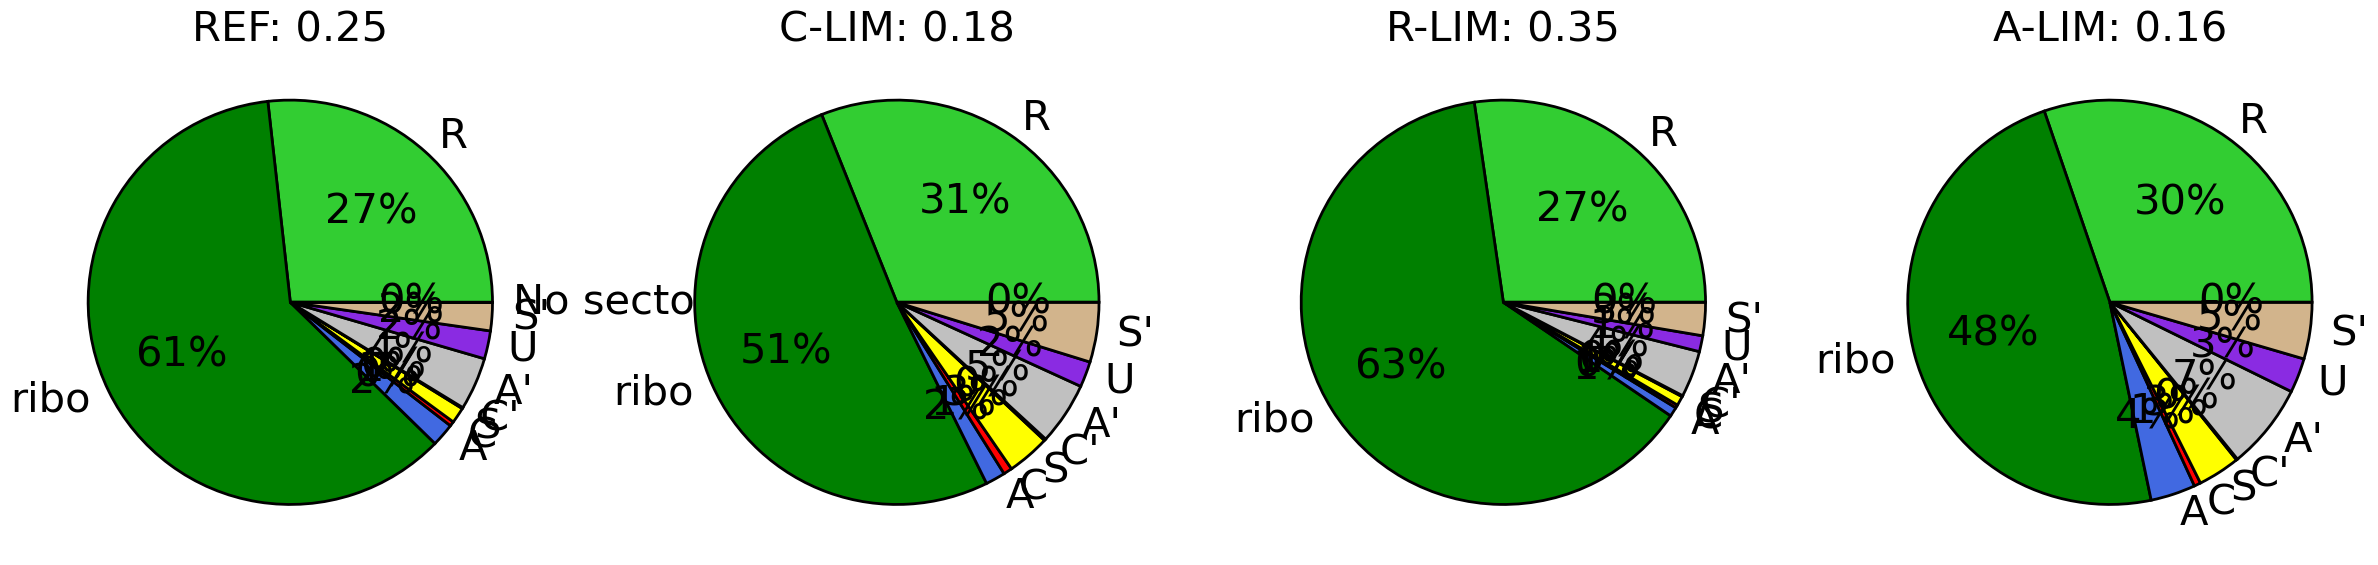

In [37]:
ppgpp_regulon = []
with open("data/ppGpp_regulondb.csv", "r") as file:  #this file contains targets of ppGpp downloaded from regulonDB
    next(file)  # Skip header
    for line in file:
        gene_name = line.split(",")[0]  # Get the first value (gene name)
        if line.split(",")[1] == 'repressor':
            ppgpp_regulon.append(gene_name)
            
with open("data/dksa_regulondb.csv", "r") as file:  #this file containes targets of dksa downloaded from regulonDB
    next(file)  # Skip header
    for line in file:
        gene_name = line.split(",")[0]  # Get the first value (gene name)
        if line.split(",")[1] == 'repressor':
            ppgpp_regulon.append(gene_name)
            
# MERGE WITH MORI'S PROTEOMICS (SO REPEATED GENES WILL APPEAR ONCE)


merged_ppgpp_regulon=data_mori.loc[data_mori['Gene name'].isin(ppgpp_regulon)]
merged_ppgpp_regulon
sector_weighted_ref = merged_ppgpp_regulon.groupby('group')['C2'].sum()
sector_weighted_clim = merged_ppgpp_regulon.groupby('group')['C7'].sum()
sector_weighted_rlim = merged_ppgpp_regulon.groupby('group')['E4'].sum()
sector_weighted_alim = merged_ppgpp_regulon.groupby('group')['D1'].sum()


sector_weighted_list = [
    pd.Series(sector_weighted_ref),
    pd.Series(sector_weighted_clim),
    pd.Series(sector_weighted_rlim),
    pd.Series(sector_weighted_alim),
]

title_list= ['REF:', 'C-LIM:', 'R-LIM:', 'A-LIM:' 
]

mass_fraction_list= [
    sector_weighted_ref.sum(),
    sector_weighted_clim.sum(),
    sector_weighted_rlim.sum(),
    sector_weighted_alim.sum(),  
]


fig, axes = plt.subplots(1, 4, figsize=(3*figw, 4*figh))
custom_order = ["R", "ribo", "A", "C", "S", "C'", "A'", "U", "S'", "No sector"]

for i, (sector_weighted, title, mass_fraction, ax) in enumerate(zip(sector_weighted_list, title_list, mass_fraction_list, axes)):
    sector_weighted = sector_weighted.reindex(custom_order)
    colors = [group_colors[group] for group in sector_weighted.index]  # Get correct colors
    sector_weighted.plot(kind='pie', autopct='%1.0f%%', fontsize=font*1.5, colors=colors, ax=ax, wedgeprops={'edgecolor': 'black', 'linewidth': 2})  
    ax.set_ylabel("")  # Remove y-axis label
    ax.set_title(f"{title} {mass_fraction:.2f}", fontsize=font*1.5)

### We define the camp_activated sector as the set of targets activated by cAMP Crp and upregulated under catabolic limitation (in particular, this excludes A sector genes activated by cAMP)

In [38]:
camp_activated_rst = data_mori.loc[(data_mori['Gene name'].isin(crp_activated['Gene'])) & (data_mori['Ctrend']=='up')]
ppgpp_repressed_rst = data_mori.loc[(data_mori['Gene name'].isin(ppgpp_repressed['Gene'])) & (data_mori['Ctrend']=='down')]

In [39]:
ribo_protein=ppgpp_repressed_rst.loc[ppgpp_repressed_rst['Gene name'].isin(names_ribo)]

### Plot wild-type expression of cAMP activated sector and ribosomal proteins vs growth rate

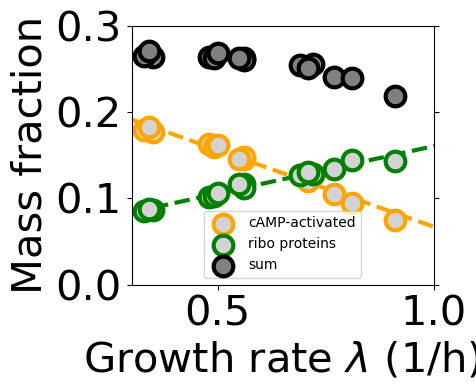

In [40]:
# sns.reset_orig()
fig=plt.figure(figsize=(figw/2, figh))
plt.scatter(legendc['Growth rate (1/h)'], camp_activated_rst[ccols].sum(), facecolor='lightgrey', edgecolor='orange', s=200, linewidth=3, label='cAMP-activated')
plt.scatter(legendc['Growth rate (1/h)'], ribo_protein[ccols].sum(), facecolor='lightgrey', edgecolor='green', s=200, linewidth=3, label='ribo proteins')
plt.scatter(legendc['Growth rate (1/h)'], ribo_protein[ccols].sum()+camp_activated_rst[ccols].sum(), facecolor='grey', edgecolor='black', s=200, linewidth=3, label='sum')

coefficients_ribo_protein = np.polyfit(legendc['Growth rate (1/h)'], ribo_protein[ccols].sum(), 1) #1-->linear fit
slope_restricted_ribo_protein, intercept_restricted_ribo_protein = coefficients_ribo_protein
restricted_gl_ribo = np.poly1d(coefficients_ribo_protein)

def inverse_gl_ribo(r):
    return (r-intercept_restricted_ribo_protein)/slope_restricted_ribo_protein

coefficients_max = np.polyfit(legendc['Growth rate (1/h)'], ribo_protein[ccols].sum()+camp_activated_rst[ccols].sum(), 1) #1-->linear fit
slope_restricted_max, intercept_restricted_max = coefficients_max
restricted_gl_max = np.poly1d(coefficients_max)

coefficients_cact=np.polyfit(legendc['Growth rate (1/h)'], camp_activated_rst[ccols].sum(), 1) #1-->linear fit
slope_restricted_cact, intercept_restricted_cact = coefficients_cact
restricted_gl_cact = np.poly1d(coefficients_cact)


lambdas=np.linspace(0,1.2,100)
plt.plot(lambdas, restricted_gl_ribo(lambdas), color='green', linewidth=3, linestyle='--', zorder=-1)
plt.plot(lambdas, restricted_gl_cact(lambdas), color='orange', linewidth=3, linestyle='--', zorder=-1)

plt.ylim(0,0.3)
plt.legend(fontsize=10)
plt.tick_params(labelsize=font*1.5)
plt.gca().yaxis.set_ticks_position('both')
plt.ylabel('Mass fraction', fontsize=font*1.5)
plt.xlabel('Growth rate $\lambda$ (1/h)', fontsize=font*1.5)
plt.xlim(0.3,1)
plt.tight_layout()
# plt.savefig('images/rrbprtvsact.svg')

**here the sum is not perfectly const (because we excluded the A sector), but approx sum=0.26 (mean)**

### Load Balakrishnan 2022 datasets.

In [41]:
bala_s6_ref=pd.read_excel('data/Balak_tableS6.xlsx', sheet_name='reference_condition')
bala_s6_clim=pd.read_excel('data/Balak_tableS6.xlsx', sheet_name='C_limited_condition')
bala_s6_ref.replace('     NaN', float('nan'), inplace=True)
bala_s6_clim.replace('     NaN', float('nan'), inplace=True)
bala_s6_ref.dropna(subset=['promoter on-rate, ki (µm3/min)', 'gene concentration [Gi] (1/µm3)', 'protein concentration [Pi] (1/µm3)'], inplace=True)
bala_s6_clim.dropna(subset=['promoter on-rate, ki (µm3/min)', 'gene concentration [Gi] (1/µm3)', 'protein concentration [Pi] (1/µm3)'], inplace=True)
camp_act_bala_clim=bala_s6_clim.loc[bala_s6_clim['gene'].isin(crp_activated['Gene'])]
camp_act_bala_ref=bala_s6_ref.loc[bala_s6_ref['gene'].isin(crp_activated['Gene'])]

In [42]:
C_gene_names = sectors['C']
P_gene_names = pd.concat([sectors['A'], sectors['C']])

In [43]:
list_ribo=pd.read_excel('data/41564_2017_BFnmicrobiol2016231_MOESM55_ESM.xlsx', header=1, sheet_name=1)
names_ribo=list_ribo['r-protein']
affiliates=pd.read_csv('data/affiliates_list.txt', header=None)    #add affiliated ribosomal protein, to complete the extended ribosome
names_ribo=names_ribo.append(affiliates[0], ignore_index=True).dropna()
balas6_ref=pd.read_excel('data/Balak_tableS6.xlsx', sheet_name='reference_condition')
balas6_clim=pd.read_excel('data/Balak_tableS6.xlsx', sheet_name='C_limited_condition')
balas6_ref.replace('     NaN', float('nan'), inplace=True)
balas6_clim.replace('     NaN', float('nan'), inplace=True)

balas6_ref.dropna(subset=['mRNA concentration [mRi] (1/µm3)', 'mRNA degradation rate (1/min)'], inplace=True)
balas6_clim.dropna(subset=['mRNA concentration [mRi] (1/µm3)', 'mRNA degradation rate (1/min)'], inplace=True)

rsector_ref=balas6_ref.loc[balas6_ref['gene'].isin(names_ribo)]
psector_ref=balas6_ref.loc[balas6_ref['gene'].isin(P_gene_names['Gene name'])]
rsector_clim=balas6_clim.loc[balas6_clim['gene'].isin(names_ribo)]
psector_clim=balas6_clim.loc[balas6_clim['gene'].isin(P_gene_names['Gene name'])]

C:\Users\DELL\AppData\Local\Temp\ipykernel_20532\2152612279.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names_ribo=names_ribo.append(affiliates[0], ignore_index=True).dropna()


In [44]:
g_rep_sector_ref=balas6_ref.loc[balas6_ref['gene'].isin(ppgpp_repressed_rst['Gene name'])]
c_act_sector_ref=balas6_ref.loc[balas6_ref['gene'].isin(camp_activated_rst['Gene name'])]
g_rep_sector_clim=balas6_clim.loc[balas6_clim['gene'].isin(ppgpp_repressed_rst['Gene name'])]
c_act_sector_clim=balas6_clim.loc[balas6_clim['gene'].isin(camp_activated_rst['Gene name'])]

### We compute average gene lengths for R, P and the whole proteome, weighted by mRNA abundances. The values are similar in ref and clim

In [45]:
bala_mrna = pd.read_excel('data/science.abk2066_table_s3.xlsx', sheet_name = 1) #rna seq from Rohan Balakrishnan 2022

rsector_mrna=bala_mrna.loc[bala_mrna['gene'].isin(names_ribo)]
psector_mrna=bala_mrna.loc[bala_mrna['gene'].isin(P_gene_names['Gene name'])]
qsector_mrna=bala_mrna.loc[~((bala_mrna['gene'].isin(names_ribo)) | (bala_mrna['gene'].isin(P_gene_names['Gene name'])))]

g_rep_sector_mrna=bala_mrna.loc[bala_mrna['gene'].isin(g_rep_sector_clim['gene'])]
c_act_sector_mrna=bala_mrna.loc[bala_mrna['gene'].isin(c_act_sector_clim['gene'])]
qsector_mrna_redef=bala_mrna.loc[~((bala_mrna['gene'].isin(names_ribo)) | (bala_mrna['gene'].isin(c_act_sector_mrna['gene'])))]

#L_r=np.average(rsector_mrna['gene length (nt)'], weights=rsector_mrna['c5'])
L_p=np.average(psector_mrna['gene length (nt)'], weights=psector_mrna['c5'])
L_q=np.average(qsector_mrna['gene length (nt)'], weights=qsector_mrna['c5'])
L = np.average(bala_mrna['gene length (nt)'], weights = bala_mrna['c5'])       
L_r_lim=np.average(rsector_mrna['gene length (nt)'], weights=rsector_mrna['c4'])
L_p_lim=np.average(psector_mrna['gene length (nt)'], weights=psector_mrna['c4'])
L_q_lim=np.average(qsector_mrna['gene length (nt)'], weights=qsector_mrna['c4'])
L_lim = np.average(bala_mrna['gene length (nt)'], weights = bala_mrna['c4'])

L_ppgpp_rep=np.average(g_rep_sector_mrna['gene length (nt)'], weights=g_rep_sector_mrna['c5'])
L_camp_act=np.average(c_act_sector_mrna['gene length (nt)'], weights=c_act_sector_mrna['c5'])
L_ppgpp_rep_lim=np.average(g_rep_sector_mrna['gene length (nt)'], weights=g_rep_sector_mrna['c4'])
L_camp_act_lim=np.average(c_act_sector_mrna['gene length (nt)'], weights=c_act_sector_mrna['c4'])
L_q_redef=np.average(qsector_mrna_redef['gene length (nt)'], weights=qsector_mrna_redef['c5'])
L_q_redef_lim=np.average(qsector_mrna_redef['gene length (nt)'], weights=qsector_mrna_redef['c4'])

L_r=3*12307/74 #3 amino acids per nucleotide. Total length of an extended ribosome from Bosdriesz 2015. For the number of proteins
                #in the extended ribosomal sector, see Scott 2010 (and Bremer 2004)
print(L_r_lim)
print(L_r)
print(L_p_lim)
print(L_p)
print(L_lim)
print(L)
print(L_camp_act_lim)
print(L_camp_act)


521.2248904570708
498.93243243243245
1092.983611239921
1095.0341240255011
773.6147600759051
739.3252124534508
762.5463477880747
813.8018075618068


**We can say protein lengths associated to different sectors are approx constant across growth conditions**

In [46]:
list_ribo=pd.read_excel('data/41564_2017_BFnmicrobiol2016231_MOESM55_ESM.xlsx', header=1, sheet_name=1)
names_ribo=list_ribo['r-protein']
affiliates=pd.read_csv('data/affiliates_list.txt', header=None)
names_ribo=names_ribo.append(affiliates[0], ignore_index=True).dropna()
balas6_ref=pd.read_excel('data/Balak_tableS6.xlsx', sheet_name='reference_condition')
balas6_clim=pd.read_excel('data/Balak_tableS6.xlsx', sheet_name='C_limited_condition')
balas6_ref.replace('     NaN', float('nan'), inplace=True)
balas6_clim.replace('     NaN', float('nan'), inplace=True)

rsector_ref=balas6_ref.loc[balas6_ref['gene'].isin(names_ribo)]
psector_ref=balas6_ref.loc[balas6_ref['gene'].isin(P_gene_names['Gene name'])]
rsector_clim=balas6_clim.loc[balas6_clim['gene'].isin(names_ribo)]
psector_clim=balas6_clim.loc[balas6_clim['gene'].isin(P_gene_names['Gene name'])]

csector_ref=balas6_ref.loc[balas6_ref['gene'].isin(sectors['C']['Gene name'])]
csector_clim=balas6_clim.loc[balas6_clim['gene'].isin(sectors['C']['Gene name'])]

C:\Users\DELL\AppData\Local\Temp\ipykernel_20532\1496505825.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  names_ribo=names_ribo.append(affiliates[0], ignore_index=True).dropna()


### Now we compute the average chromosomal position for different sectors, weighted by mRNA abundance

In [47]:
gene_loc = pd.read_csv('data/Copy-of-All-genes-of-E.-coli-K-12-substr.-MG1655.txt', sep='\t')   #Table downloaded from Ecocyc
tot_len = max(gene_loc['Right-End-Position'])  #Total chromosome length
ori_x = 3925975 #ori site from Ecocyc
ter_x = 1609179 #ter site from Ecocyc
def find_position(position):         #this function finds the normalized distance of a gene from ori given its location
    if (position>ter_x)&(position>ori_x):
        return (position-ori_x)/tot_len*2
    if (position>ter_x)&(position<ori_x):
        return (-position+ori_x)/tot_len*2
    if (position<ter_x):
        return 1-(ter_x-position)/tot_len*2
    
gene_loc.loc[gene_loc['Gene Name']=='nmpC', 'Right-End-Position'] = 576825
gene_loc.loc[gene_loc['Gene Name']=='nmpC', 'Left-End-Position'] = 575786
gene_loc.loc[gene_loc['Gene Name']=='crl', 'Right-End-Position'] = 257829
gene_loc.loc[gene_loc['Gene Name']=='crl', 'Left-End-Position'] =  259006   #these are not in the original file, probably due to gene interruption

merged_position_mrna = pd.merge(gene_loc, bala_mrna, left_on ='Gene Name', right_on='gene')
rmerged_position_mrna=merged_position_mrna.loc[merged_position_mrna['gene'].isin(names_ribo)]
pmerged_position_mrna=merged_position_mrna.loc[merged_position_mrna['gene'].isin(P_gene_names['Gene name'])]
camp_act_position_mrna=merged_position_mrna.loc[merged_position_mrna['gene'].isin(camp_activated_rst['Gene name'])]

for index, row in rmerged_position_mrna.iterrows():
    rmerged_position_mrna.loc[index, 'x'] = find_position(row['Right-End-Position'])

for index, row in pmerged_position_mrna.iterrows():
    pmerged_position_mrna.loc[index, 'x'] = find_position(row['Right-End-Position'])

for index, row in camp_act_position_mrna.iterrows():
    camp_act_position_mrna.loc[index, 'x'] = find_position(row['Right-End-Position'])
                             
xr_estimate=np.average(rmerged_position_mrna['x'], weights=rmerged_position_mrna['c5'])
xp_estimate=np.average(pmerged_position_mrna['x'], weights=pmerged_position_mrna['c5'])
x_camp_activated=np.average(camp_act_position_mrna['x'], weights=camp_act_position_mrna['c5'])
print(xr_estimate)
print(xp_estimate)
print(x_camp_activated)

0.2753347384763917
0.5803951428350003
0.5217370236904156


C:\Users\DELL\AppData\Local\Temp\ipykernel_20532\2276146228.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rmerged_position_mrna.loc[index, 'x'] = find_position(row['Right-End-Position'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_20532\2276146228.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pmerged_position_mrna.loc[index, 'x'] = find_position(row['Right-End-Position'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_20532\2276146228.py:30: SettingWithCopyWarning: 
A value is trying to be set on a

In [48]:
legend_mori = pd.read_excel('data/mori_legend.xlsx', sheet_name = 'EV3-Samples-2')
legend_mori['Group'] = legend_mori['Group'].fillna(method='ffill')
legend_mori=legend_mori.iloc()[:,:3]
legend_mori
c_filter=['Gene name', 'Gene locus', 'Protein ID', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'D6', 'D7', 'D8', 'F4', 'F5', 'F6', 'F7', 'F8']
ccols = moric.loc[:, 'C2':'F8'].columns
moric=data_mori[c_filter]
moric.insert(loc=18,column='intercept', value=None)
moric.insert(loc=19,column='slope', value=None)
Rsector=moric[moric['Gene name'].isin(names_ribo.values)]
legendc = legend_mori[legend_mori['Group'] == 'C-limitation']
columns_to_sum = Rsector.loc[:,ccols]
sum_clim=columns_to_sum.sum()

## Setting up the model fitting

**We use data as reported in Balakrishnan 2022 SI to find the Cperiod-growth rate relationship**

Text(0, 0.5, '$\\lambda \\cdot C$')

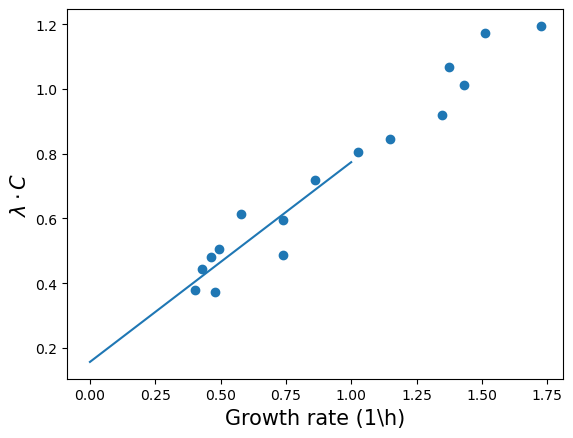

In [49]:
cperiod_data=pd.read_csv('data/Balakrishnan_lambdac.csv')    #got this with webplotdigitizer
x=cperiod_data['Growth rate']
y=cperiod_data['lambdac'] # product between lambda and c period
model = LinearRegression(fit_intercept=True)
model.fit(x.values.reshape(-1, 1), y)
inter_Cperiod, slope_Cperiod = model.intercept_, model.coef_[0]
# plt.plot(growthrates, inter_Cperiod+slope_Cperiod*growthrates)

growthrates=np.linspace(0,1,1000)
plt.plot(growthrates, inter_Cperiod+slope_Cperiod*growthrates)
plt.scatter(cperiod_data['Growth rate'], cperiod_data['lambdac'])
plt.xlabel('Growth rate (1\h)', fontsize=15)
plt.ylabel(r'$\lambda \cdot C$', fontsize=15)

# Data comparison analysis

In [50]:
def lCperiod(lam):
    return inter_Cperiod+slope_Cperiod*lam            #returns the c period given the growth rate

def correction(lam, x_i):                               #correction to promoter activities due to gene dosage
    return np.exp(-lCperiod(lam)*x_i)                   #returns gene dosage relative to ori
                                                        #input:growth rate and normalized distance from ori
def growthrate(ribos):
    return (ribos/0.76-inter_zhu)/slope_zhu             #returns the growth rate given the ribosomal fraction
                                                        #using the growth law in zhu2019

***Prior to fitting, for ODR to work, set a nonzero value for the growth rate error. Assuming a negligible error on the dependent variable (i.e. all variables resulting from growth rate) negatively impacts the goodness of fit, because then independent variable is used as approx exact***

In [51]:
# complete_merged['err_GR_x']=0.000001  #e.g. try to set this minimal error
# complete_merged['err_GR_y']=0.000001  #e.g. try to set this minimal error
complete_merged['err_GR_x']=0.025     #the order of magnitude of a realistic small error on the growth rate
complete_merged['err_GR_y']=0.025     #the order of magnitude of a realistic small error on the growth rate
complete_merged

,mean_GR_x,err_GR_x,mean_ppgpp,err_ppgpp,strain,Carbon Source,Dox,Date Sampling,mean_GR_y,err_GR_y,mean_camp,err_camp
0,0.932697,0.025,28.029890,7.166945,WT,glucose,0.00,20220222,0.932697,0.025,1.778786,0.289129
1,0.907332,0.025,19.245597,3.396529,WT,glucose,0.00,20220223,0.907332,0.025,1.484733,0.088046
2,0.555879,0.025,35.362053,5.538916,WT,glycerol,0.00,20220328,0.555879,0.025,6.547888,0.201113
3,0.515821,0.025,42.206403,5.669287,pTetRelA,glycerol,0.00,20220329,0.515821,0.025,6.747955,0.120049
4,0.791281,0.025,71.758422,7.189250,pTetRelA,glucose,0.20,20220426,0.791281,0.025,1.831984,0.249613
5,0.543426,0.025,45.364538,6.226826,pTetRelA,glycerol,0.00,20220429,0.543426,0.025,8.400784,0.459051
6,0.391466,0.025,111.913231,4.039325,pTetRelA,glycerol,0.20,20220504,0.391466,0.025,7.053680,0.301821
7,0.456706,0.025,96.601417,2.227872,pTetRelA,glycerol,0.20,20220510,0.456706,0.025,9.280722,0.361553
8,0.288723,0.025,250.802312,16.876408,pTetRelA,glycerol,0.40,20220511,0.288723,0.025,7.919913,0.310419
9,0.329194,0.025,119.981214,14.983019,pTetRelA,glycerol,0.30,20220513,0.329194,0.025,12.937663,0.693414


**The cell below performs data fitting of the model in the main text to the ribosome(growth rate)- ppGpp,cAMP measurements**

In [52]:
correction_flag=False  #no gene dosage effects
xR=0.5
xP=0.5    #no gene dosage effects

from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import norm
from scipy.odr import ODR, Model, RealData

#we can also try a version including degradation rates
def equation(x, ratio, phimax):
    return 1+ratio*L_p/L_r*(correction(growthrate(x), xP)/correction(growthrate(x), xR))- phimax/x  #needed if correction_flag

def compute_ratio(gr,phimax):
    if correction_flag==True:
        return (phimax/(phir(gr))-1)*correction(gr, xR)/correction(gr, xP)*L_r/L_p  #computes the ratio betaP/betaR from the growth rate gr
    
    if correction_flag==False:   
        return (phimax/phir(gr)-1)*L_r/L_p
    
def compute_fraction(ratio, phimax):   # Computes ribosomal mass fraction from promoter AFFINITY ratio betaP/betaR
    if correction_flag==True:   
        initial_guess = phimax / (1 + ratio * L_p / L_r) 
        return fsolve(equation, initial_guess, args=(ratio, phimax))  #to keep into account gene copy number
    
    if correction_flag==False:
        return phimax / (1 + ratio * L_p / L_r)

def err_prop(gr, gr_err, phimax):  #growth rate uncertainty propagation through the ratio formula
    return phimax*slope_zhu*0.76*gr_err/(phir(gr))**2   #actually this is negligible because errors on growth rates
                                                        #are << errors on ppgpp and camp
def betaP(eps0, eps):
    return 1+eps/eps0     #functional form chosen for the promoter strength of P sector

def betaR(gpoint, ppgpp):
    return 1+gpoint/ppgpp     #functional form chosen for the promoter strength of R sector

def fit(parametri, var):
    eps=var[1]
    g=var[0]
    gpoint=parametri[0]
    eps0=parametri[1]     #ratio of basal promoter strengths
    eps1=parametri[2]
    y=eps1*betaP(eps0, eps)/betaR(gpoint, g)
    return y          #returns ratio betaP/betaR


#Here below we define some filters; you can apply the fit to single carbon sources. We used the complete merged dataset
condition_glu = (complete_merged['Carbon Source'] == 'glucose')
condition_suc = (complete_merged['Carbon Source'] == 'succinate')
condition_gly = (complete_merged['Carbon Source'] == 'glycerol')
condition_others = (complete_merged['Carbon Source'] == 'glutamate')|(complete_merged['Carbon Source'] == 'aspartate')|(complete_merged['Carbon Source'] == 'acetate')
condition = (condition_glu|condition_suc|condition_gly|condition_others)  #all the conditions are included in this filter
conc=(complete_merged['mean_ppgpp'][condition], complete_merged['mean_camp'][condition]) 
conc_errors = (complete_merged['err_ppgpp'][condition], complete_merged['err_camp'][condition])
yps = compute_ratio(complete_merged['mean_GR_x'][condition], phi_max) #independent variable (ratio of promoter strengths)

data = RealData(conc, yps, sx=conc_errors, sy=err_prop(complete_merged['mean_GR_x'][condition], complete_merged['err_GR_x'][condition], phi_max)) 


model = Model(fit)


odr = ODR(data, model, beta0=[40, 3, 3])  #beta0 is the initital choice


output = odr.run()

print('Optimized parameters:', output.beta)


print(f'res_var: {output.res_var}')
for parameter_name, value in zip(['g0', 'eps0', 'eps1'], output.beta):
    print(f'{parameter_name}: {value}')




Optimized parameters: [23.42200094 11.88924247  0.83741136]
res_var: 1.74432407394882
g0: 23.422000936478668
eps0: 11.889242466089529
eps1: 0.8374113554968678


**Visualize the ouput of the ODR in the ppGpp-cAMP plane**

**Stars are data points as displaced by ODR, they match our data points (circles and squares)**

Text(0, 0.5, 'cAMP')

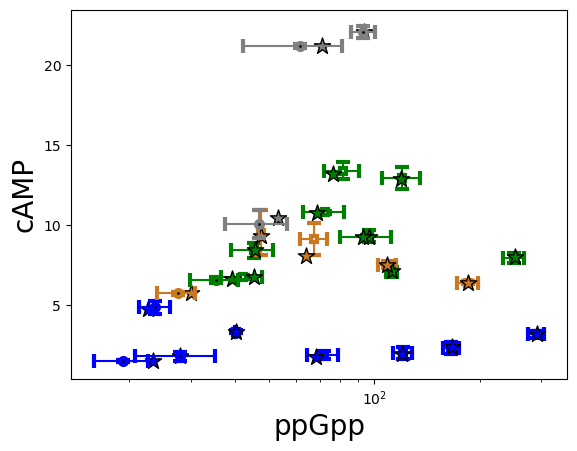

In [53]:
for i, e in enumerate(output.xplus[0]):
    plt.scatter(output.xplus[0][i], output.xplus[1][i], color=color_dict[complete_merged[condition]['Carbon Source'].values[i]], s=150, marker='*', edgecolor='black')
plt.xscale('log')
for idx, row in merged_wt.iterrows():
    plt.errorbar(row['mean_ppgpp'], row['mean_camp'],
                 xerr=row['err_ppgpp'], yerr=row['err_camp'],
                 #label='WT' if idx == 1 else "", #add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=5, markeredgewidth=3, zorder=1, capsize=cap)
for idx, row in merged_rela.iterrows():
    plt.errorbar(row['mean_ppgpp'], row['mean_camp'],
                 xerr=row['err_ppgpp'], yerr=row['err_camp'],
                 #label='RelA' if idx == 1 else "",  
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=rela_marker, markerfacecolor=rela_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=5, markeredgewidth=3, zorder=0, capsize=cap)
    
plt.xlabel('ppGpp', fontsize=font)
plt.ylabel('cAMP', fontsize=font)

***Figure S3A***

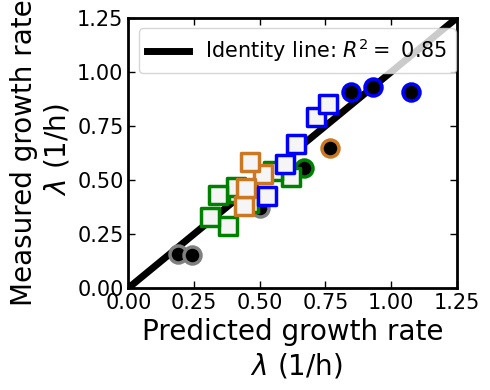

In [54]:
from sklearn.linear_model import LinearRegression
fig = plt.figure(figsize=(figw/2, figh))

# Collect data points
x_vals = []
y_vals = []

for _, row in complete_merged[condition].loc[complete_merged[condition]['strain'] == 'WT'].iterrows():
    y = row['mean_GR_x']
    x = growthrate(compute_fraction(fit(output.beta, (conc[0][row.name], conc[1][row.name])), phi_max))
    x_vals.append(x)  # Flip x and y
    y_vals.append(y)  # Flip x and y
    plt.scatter(x, y, edgecolor=color_dict[row['Carbon Source']],  # Flip x and y
                marker=wt_marker, facecolor=wt_face, linewidth=2.5, s=150)

for _, row in complete_merged[condition].loc[complete_merged[condition]['strain'] == 'pTetRelA'].iterrows():
    y = row['mean_GR_x']
    x = growthrate(compute_fraction(fit(output.beta, (conc[0][row.name], conc[1][row.name])), phi_max))
    x_vals.append(x)  # Flip x and y
    y_vals.append(y)  # Flip x and y
    plt.scatter(x, y, edgecolor=color_dict[row['Carbon Source']],  # Flip x and y
                marker=rela_marker, facecolor=rela_face, linewidth=2.5, s=150)

# Convert lists to numpy arrays
x_vals = np.array(x_vals)  # No need to reshape
y_vals = np.array(y_vals)

# Predicted y values assuming y = x
y_pred_identity = x_vals  # The predicted y is just equal to x in this case

# Calculate R^2 for the identity line (slope = 1, intercept = 0)
ss_total = np.sum((y_vals - np.mean(y_vals))**2)  # Total sum of squares
ss_residual = np.sum((y_vals - y_pred_identity)**2)  # Residual sum of squares
r_squared_identity = 1 - (ss_residual / ss_total)  # R^2 for the identity fit

# Plot identity line
x_bis=np.linspace(0,1.3,30)
plt.plot(x_bis, x_bis, color='black', linewidth=5, zorder=0, label=f"Identity line: $R^2=$ {r_squared_identity:.2f}")

# Labels and limits
plt.xlim(0, 1.25)
plt.ylim(0, 1.25)
plt.xticks([0,0.25,0.5,0.75,1,1.25])
plt.yticks([0,0.25,0.5,0.75,1,1.25])
plt.xlabel('Predicted growth rate\n $\lambda$ (1/h)', fontsize=font)
plt.ylabel('Measured growth rate\n $\lambda$ (1/h)', fontsize=font)
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)
plt.tick_params(labelsize=label, direction='in', width=1, length=5)
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.legend(fontsize=label, loc='upper left')
plt.tight_layout()
plt.savefig('images/residual_check.svg')
plt.show()

***Below: visualization of the ratio of promoter strengths as a function of ppGpp (not in the paper, but useful to understand the process)***

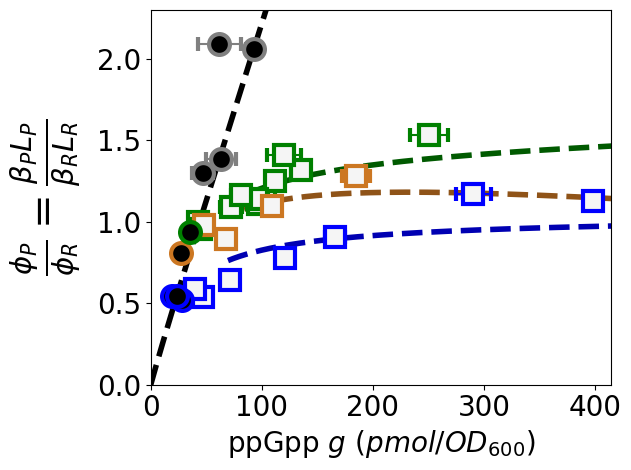

In [55]:
g=np.linspace(0.01,500,1000)
conc_wt=np.column_stack((g, q_wt+m_wt*g)) 
conc_glu=np.column_stack((g, q_glu+m_glu*g))
conc_gly=np.column_stack((g, q_gly+m_gly*g))
conc_suc=np.column_stack((g, q_suc+m_suc*g))   #Here, we generate the four cAMP-ppGpp fitted lines (wt and three carbon sources under overexpression)
                                               #we need them to visualize the fit in the ppGpp-phiR plane

y_wt  = np.array([fit(output.beta, row) for row in conc_wt])
y_glu = np.array([fit(output.beta, row) for row in conc_glu])
y_gly = np.array([fit(output.beta, row) for row in conc_gly])
y_suc = np.array([fit(output.beta, row) for row in conc_suc])   #Here, we calculate the sector strength ratio along the fitted lines

# Find intersection points
def find_intersection(x, y1, y2):
    idx = np.argwhere(np.isclose(y1, y2, atol=8e-1)).flatten()
    if len(idx) > 0:
        return max(x[idx]), max(y1[idx])
    return None, None

intersect_glu_x, intersect_glu_y = find_intersection(g, y_wt, y_glu)
intersect_gly_x, intersect_gly_y = find_intersection(g, y_wt, y_gly)
intersect_suc_x, intersect_suc_y = find_intersection(g, y_wt, y_suc)

# Plot the first line normally
plt.plot(g, y_wt, color='black', linestyle='--', linewidth=4, zorder=-1)

# Plot the other lines from their intersection points
if intersect_glu_x is not None:
    plt.plot(g[g >= intersect_glu_x], y_glu[g >= intersect_glu_x], color=darken_color(color_dict['glucose'], 0.3), linestyle='--', linewidth=4, zorder=-1)
if intersect_gly_x is not None:
    plt.plot(g[g >= intersect_gly_x], y_gly[g >= intersect_gly_x], color=darken_color(color_dict['glycerol'], 0.3), linestyle='--', linewidth=4, zorder=-1)
if intersect_suc_x is not None:
    plt.plot(g[g >= intersect_suc_x], y_suc[g >= intersect_suc_x], color=darken_color(color_dict['succinate'], 0.3), linestyle='--', linewidth=4, zorder=-1)

for idx, row in milan_ppgpp_data_wt.iterrows():
    plt.errorbar(row['Concentration'], compute_ratio(row['Growth Rate'], phi_max),
                 xerr=row['Concentration Error'],
                 label='WT' if idx == 1 else "", #add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15, markeredgewidth=3, zorder=1, capsize=cap)
for idx, row in milan_ppgpp_data_relA.iterrows():
    plt.errorbar(row['Concentration'], compute_ratio(row['Growth Rate'], phi_max),
                 xerr=row['Concentration Error'],
                 label='RelA' if idx == 1 else "", #add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=rela_marker, markerfacecolor=rela_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15, markeredgewidth=3, zorder=0, capsize=cap)    

plt.xlabel('ppGpp ' r'$ g \ (pmol/OD_{600})$', fontsize=20)
plt.ylabel(r'$\frac{\phi_P}{\phi_R}=\frac{\beta_P L_P}{\beta_R L_R}$', fontsize=30,labelpad=10)
plt.tick_params(axis='both', which='both', labelsize=20)
plt.ylim(0,2.3)
plt.xlim(0,415)
plt.tight_layout()
# plt.savefig('images/P_hyp_ratio_fit.pdf')
# plt.savefig('images/P_hyp_ratio_fit.svg')
plt.show()

***Now we plot $\phi_R$***

In [56]:
conc_wt=np.column_stack((g, q_wt+m_wt*g))             #find camp concentration according to linear fit with ppGpp
conc_glu=np.column_stack((g, q_glu+m_glu*g))
conc_gly=np.column_stack((g, q_gly+m_gly*g))
conc_suc=np.column_stack((g, q_suc+m_suc*g))

ratios_wt = [fit(output.beta, row) for row in conc_wt]     #find ratios of sector strenghts along these curves
ratios_glu = [fit(output.beta, row) for row in conc_glu]
ratios_gly = [fit(output.beta, row) for row in conc_gly]
ratios_suc = [fit(output.beta, row) for row in conc_suc]


y_wt  = np.array([compute_fraction(row2, phi_max) for row2 in ratios_wt])         #get the ribosomal fraction from the strength ratio
y_glu  = np.array([compute_fraction(row2, phi_max) for row2 in ratios_glu])
y_gly  = np.array([compute_fraction(row2, phi_max) for row2 in ratios_gly])
y_suc  = np.array([compute_fraction(row2, phi_max) for row2 in ratios_suc])

def find_intersection(x, y1, y2):
    idx = np.argwhere(np.isclose(y1, y2, atol=8e-3)).flatten()
    if len(idx) > 0:
        return max(x[idx]), min(y1[idx])
    return None, None

intersect_glu_x, intersect_glu_y = find_intersection(g, y_wt, y_glu)
intersect_gly_x, intersect_gly_y = find_intersection(g, y_wt, y_gly)
intersect_suc_x, intersect_suc_y = find_intersection(g, y_wt, y_suc)


In [57]:
# getting paramters for the fit constrained through wild-type points
conc_wt=np.column_stack((g, q_wt+m_wt*g))
conc_glu=np.column_stack((g, q_glu_cnt+m_glu_cnt*g))
conc_gly=np.column_stack((g, q_gly_cnt+m_gly_cnt*g))
conc_suc=np.column_stack((g, q_suc_cnt+m_suc_cnt*g))

ratios_wt = [fit(output.beta, row) for row in conc_wt]
ratios_glu_cnt = [fit(output.beta, row) for row in conc_glu]
ratios_gly_cnt = [fit(output.beta, row) for row in conc_gly]
ratios_suc_cnt = [fit(output.beta, row) for row in conc_suc]


y_wt  = np.array([compute_fraction(row2, phi_max) for row2 in ratios_wt])
y_glu_cnt  = np.array([compute_fraction(row2, phi_max) for row2 in ratios_glu_cnt])
y_gly_cnt  = np.array([compute_fraction(row2, phi_max) for row2 in ratios_gly_cnt])
y_suc_cnt  = np.array([compute_fraction(row2, phi_max) for row2 in ratios_suc_cnt])


def find_intersection(x, y1, y2):
    idx = np.argwhere(np.isclose(y1, y2, atol=8e-4)).flatten()
    if len(idx) > 0:
        return max(x[idx]), min(y1[idx])
    return None, None

intersect_glu_x_cnt, intersect_glu_y_cnt = find_intersection(g, y_wt, y_glu_cnt)
intersect_gly_x_cnt, intersect_gly_y_cnt = find_intersection(g, y_wt, y_gly_cnt)
intersect_suc_x_cnt, intersect_suc_y_cnt = find_intersection(g, y_wt, y_suc_cnt)

In [58]:
# get parameters for the quadratic fit
conc_wt=np.column_stack((g, q_wt+m_wt*g))
conc_glu_cnt=np.column_stack((g, q_glu_cnt+m_glu_cnt*g))
conc_gly_quad=np.column_stack((g, quadratic_pred_gly(g)))
conc_suc_quad=np.column_stack((g, quadratic_pred_suc(g)))

ratios_wt = [fit(output.beta, row) for row in conc_wt]
ratios_glu_cnt = [fit(output.beta, row) for row in conc_glu_cnt]
ratios_gly_quad = [fit(output.beta, row) for row in conc_gly_quad]
ratios_suc_quad = [fit(output.beta, row) for row in conc_suc_quad]


y_wt  = np.array([compute_fraction(row2, phi_max) for row2 in ratios_wt])
y_glu_cnt  = np.array([compute_fraction(row2, phi_max) for row2 in ratios_glu_cnt])
y_gly_quad  = np.array([compute_fraction(row2, phi_max) for row2 in ratios_gly_quad])
y_suc_quad  = np.array([compute_fraction(row2, phi_max) for row2 in ratios_suc_quad])


def find_intersection(x, y1, y2):
    idx = np.argwhere(np.isclose(y1, y2, atol=8e-4)).flatten()
    if len(idx) > 0:
        return max(x[idx]), min(y1[idx])
    return None, None

intersect_glu_x_cnt, intersect_glu_y_cnt = find_intersection(g, y_wt, y_glu_cnt)
intersect_gly_x_cnt, intersect_gly_y_cnt = find_intersection(g, y_wt, y_gly_cnt)
intersect_suc_x_cnt, intersect_suc_y_cnt = find_intersection(g, y_wt, y_suc_cnt)

In [59]:
label=15*1.5
font=20*1.4

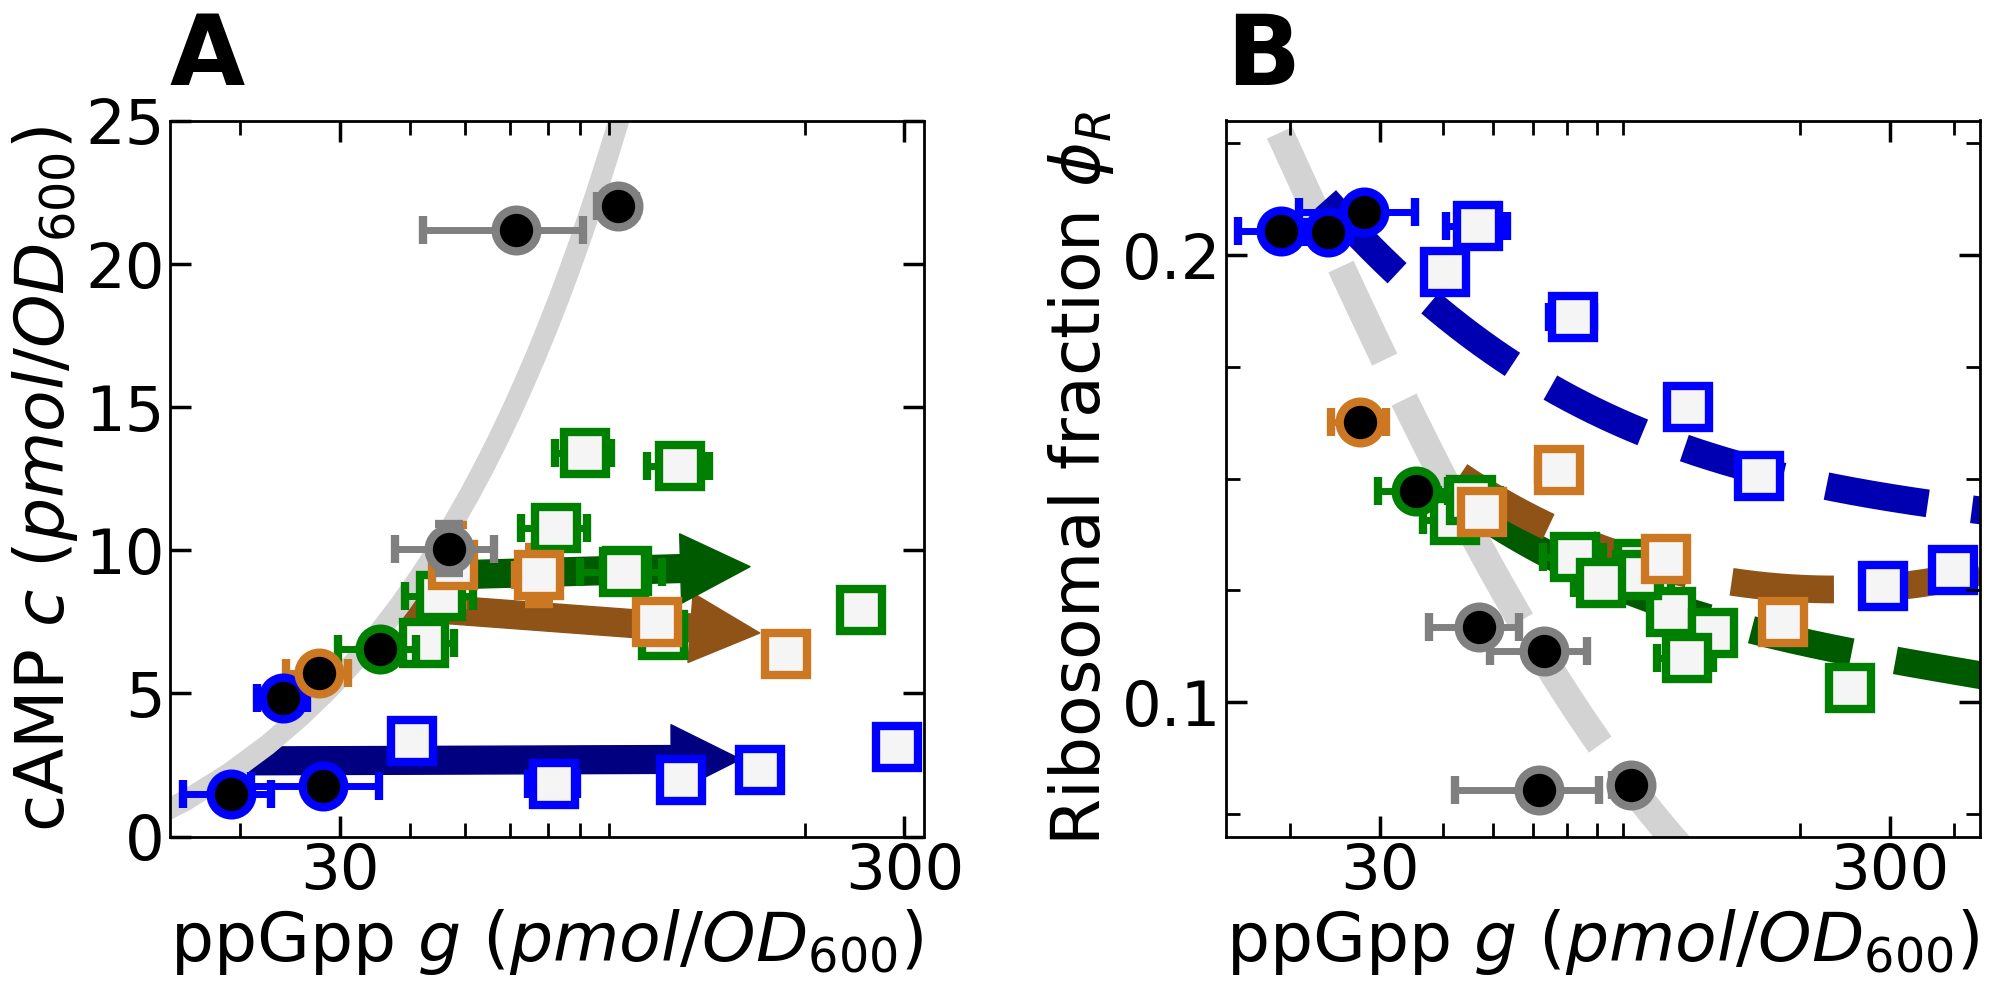

In [60]:
import matplotlib.ticker
fig, axs = plt.subplots(1,2,figsize=(2*figw,2.5*figh))
ax1, ax3 = axs.flat
g=np.linspace(0.01,315,100)

ax1.text(0., 1.05, 'A', transform=ax1.transAxes, 
            size=font*2.5, weight='bold')
ax1.plot(g, q_wt +m_wt * g, color='lightgrey', linewidth=15, zorder=-1)

lent=120
arrow_width=3
arrow_glu = FancyArrowPatch((x_p_glu, y_p_glu), (x_p_glu+(lent+15), y_p_glu+m_glu*(lent+15)), mutation_scale=100, color=darken_color(color_dict['glucose'], 0.5), zorder=-2)
ax1.add_patch(arrow_glu)
arrow_suc = FancyArrowPatch((x_p_suc, y_p_suc), (x_p_suc+(lent+10), y_p_suc+m_suc*(lent+10)), mutation_scale=100, color=darken_color(color_dict['succinate']), zorder=-2)
ax1.add_patch(arrow_suc)
arrow_gly = FancyArrowPatch((x_p_gly, y_p_gly), (x_p_gly+lent, y_p_gly+m_gly*lent), mutation_scale=100, color=darken_color(color_dict['glycerol']), zorder=-2)
ax1.add_patch(arrow_gly)


for idx, row in merged_wt.iterrows():
    ax1.errorbar(row['mean_ppgpp'], row['mean_camp'],
                 xerr=row['err_ppgpp'], yerr=row['err_camp'],
                 #label='WT' if idx == 1 else "", #add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15*2, markeredgewidth=3*2, zorder=1,
                 capsize=2*cap, elinewidth=eline)
for idx, row in merged_rela.iterrows():
    ax1.errorbar(row['mean_ppgpp'], row['mean_camp'],
                 xerr=row['err_ppgpp'], yerr=row['err_camp'],
                 #label='RelA' if idx == 1 else "",  
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=rela_marker, markerfacecolor=rela_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15*2, markeredgewidth=3*2, zorder=0,
                 capsize=2*cap, elinewidth=eline)
ax1.set_xlabel('ppGpp $g \ (pmol/OD_{600})$', fontsize=1.75*font)
ax1.set_ylabel('cAMP $c \ (pmol/OD_{600})$', fontsize=1.75*font)
ax1.tick_params(labelsize=label, axis='both')
ax1.set_ylim(0,25)
ax1.set_xlim(15,325)
ax1.set_xscale('log')
ax1.tick_params(labelsize=2*label)

g=np.linspace(0.01,500,1000)
ax3.text(0., 1.05, 'B', transform=ax3.transAxes, 
            size=font*2.5, weight='bold')
ax3.plot(g, y_wt, color='lightgrey', linestyle='dashed', linewidth=20, zorder=-2)

# Plot the other lines from their intersection points
if intersect_glu_x is not None:
    ax3.plot(g[g >= intersect_glu_x], y_glu[g >= intersect_glu_x], color=darken_color(color_dict['glucose'], 0.3), linestyle='dashed', linewidth=20, zorder=-2)
if intersect_gly_x is not None:
    ax3.plot(g[g >= intersect_gly_x], y_gly[g >= intersect_gly_x], color=darken_color(color_dict['glycerol'], 0.3), linestyle='dashed', linewidth=20, zorder=-2)
if intersect_suc_x is not None:
    ax3.plot(g[g >= intersect_suc_x], y_suc[g >= intersect_suc_x], color=darken_color(color_dict['succinate'], 0.3), linestyle='dashed', linewidth=20, zorder=-2)
for idx, row in milan_ppgpp_data_wt.iterrows():
    ax3.errorbar(row['Concentration'], phir(row['Growth Rate']),
                 xerr=row['Concentration Error'],
                 label='WT' if idx == 1 else "",  # Add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15*2, markeredgewidth=3*2, zorder=1,
                 capsize=2*cap, elinewidth=eline)
for idx, row in milan_ppgpp_data_relA.iterrows():
    ax3.errorbar(row['Concentration'], phir(row['Growth Rate']),
                 xerr=row['Concentration Error'],
                 label='RelA' if idx == 1 else "",  # Add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=rela_marker, markerfacecolor=rela_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15*2, markeredgewidth=3*2, zorder=0,
                 capsize=2*cap, elinewidth=eline)

ax3.set_xlabel('ppGpp ' r'$ g\ (pmol/OD_{600})$', fontsize=1.75*font)
ax3.set_ylabel('Ribosomal fraction $\phi_R$', fontsize=1.75*font)
ax3.tick_params(axis='both', labelsize=2*label)
ax3.tick_params(axis='both', which='major', width=2.5, length=15, direction='in')
ax1.tick_params(axis='both', which='major', width=2.5, length=15, direction='in')
ax2.tick_params(axis='both', which='major', width=2.5, length=15, direction='in')
ax3.tick_params(axis='both', which='minor', width=2, length=10, direction='in')
ax1.tick_params(axis='both', which='minor', width=2, length=10, direction='in')
ax3.yaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax3.set_ylim(0.07, 0.23)
ax3.set_xlim(15,450)
ax3.set_xscale('log')
ax3.yaxis.set_minor_locator(MultipleLocator(0.025))
ax3.yaxis.set_major_locator(MultipleLocator(0.1))
ax3.set_xticks([30,300])
ax1.set_xticks([30,300])
for spine in ax1.spines.values():
    spine.set_linewidth(2)
for spine in ax3.spines.values():
    spine.set_linewidth(2)
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax3.xaxis.set_minor_locator(MultipleLocator(25))   
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()

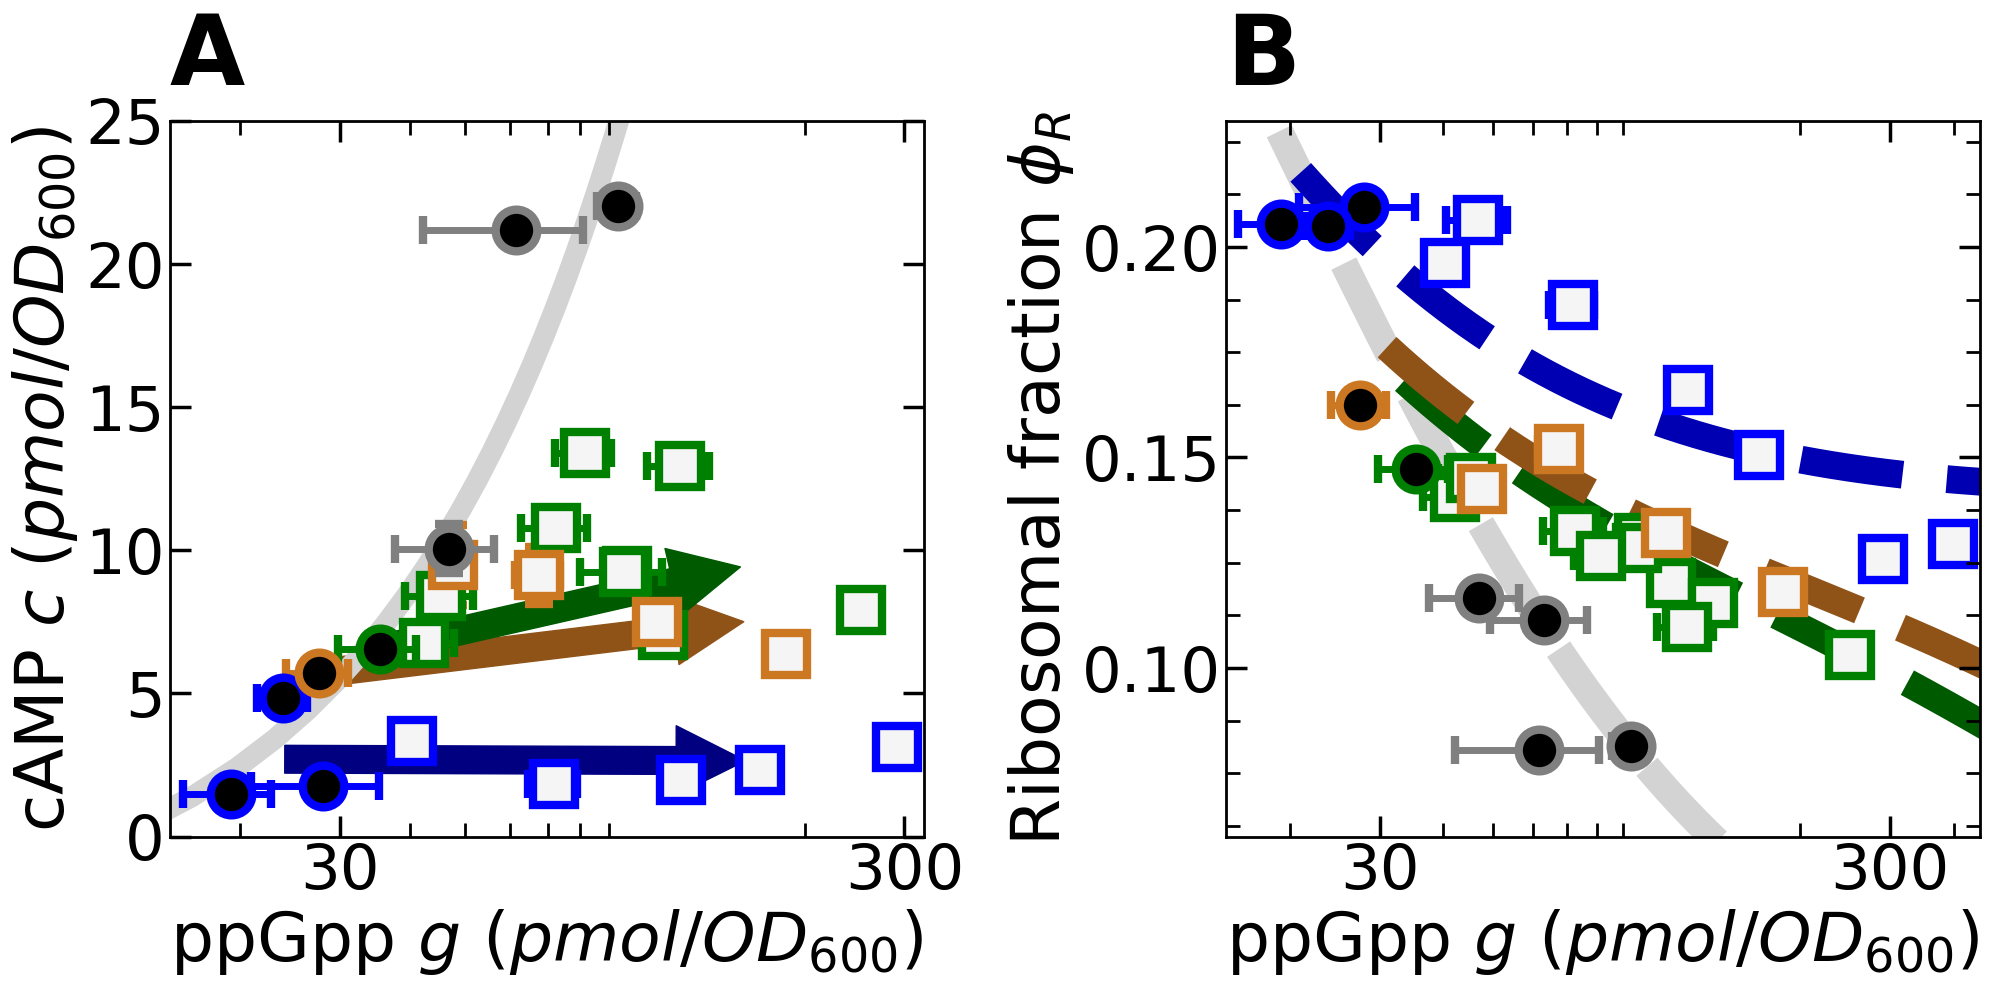

In [61]:
fig, axs = plt.subplots(1,2,figsize=(2*figw,2.5*figh))
ax1, ax3 = axs.flat
g=np.linspace(0.01,325,100)

ax1.text(0., 1.05, 'A', transform=ax1.transAxes, 
            size=font*2.5, weight='bold')
ax1.plot(g, q_wt +m_wt * g, color='lightgrey', linewidth=15, zorder=-1)

lent=120
arrow_width=3
arrow_glu = FancyArrowPatch((x_p_glu_cnt, y_p_glu_cnt), (x_p_glu_cnt+(lent+15), y_p_glu_cnt+m_glu_cnt*(lent+15)), mutation_scale=100, color=darken_color(color_dict['glucose'], 0.5), zorder=-2)
ax1.add_patch(arrow_glu)
arrow_suc = FancyArrowPatch((x_p_suc_cnt, y_p_suc_cnt), (x_p_suc_cnt+(lent+10), y_p_suc_cnt+m_suc_cnt*(lent+10)), mutation_scale=100, color=darken_color(color_dict['succinate']), zorder=-2)
ax1.add_patch(arrow_suc)
arrow_gly = FancyArrowPatch((x_p_gly_cnt, y_p_gly_cnt), (x_p_gly_cnt+lent, y_p_gly_cnt+m_gly_cnt*lent), mutation_scale=100, color=darken_color(color_dict['glycerol']), zorder=-2)
ax1.add_patch(arrow_gly)


for idx, row in merged_wt.iterrows():
    ax1.errorbar(row['mean_ppgpp'], row['mean_camp'],
                 xerr=row['err_ppgpp'], yerr=row['err_camp'],
                 #label='WT' if idx == 1 else "", #add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15*2, markeredgewidth=3*2, zorder=1,
                 capsize=2*cap, elinewidth=eline)
for idx, row in merged_rela.iterrows():
    ax1.errorbar(row['mean_ppgpp'], row['mean_camp'],
                 xerr=row['err_ppgpp'], yerr=row['err_camp'],
                 #label='RelA' if idx == 1 else "",  
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=rela_marker, markerfacecolor=rela_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15*2, markeredgewidth=3*2, zorder=0,
                 capsize=2*cap, elinewidth=eline)
ax1.set_xlabel('ppGpp $g \ (pmol/OD_{600})$', fontsize=1.75*font)
ax1.set_ylabel('cAMP $c \ (pmol/OD_{600})$', fontsize=1.75*font)
ax1.tick_params(labelsize=label, axis='both')
ax1.set_ylim(0,25)
ax1.set_xlim(15,325)
ax1.tick_params(labelsize=2*label)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.set_xscale('log')

g=np.linspace(0.01,500,1000)
ax3.text(0., 1.05, 'B', transform=ax3.transAxes, 
            size=font*2.5, weight='bold')
ax3.plot(g, y_wt, color='lightgrey', linestyle='dashed', linewidth=20, zorder=-2)

# Plot the other lines from their intersection points
if intersect_glu_x is not None:
    ax3.plot(g[g >= intersect_glu_x_cnt], y_glu_cnt[g >= intersect_glu_x_cnt], color=darken_color(color_dict['glucose'], 0.3), linestyle='dashed', linewidth=20, zorder=-2)
if intersect_gly_x is not None:
    ax3.plot(g[g >= intersect_gly_x_cnt], y_gly_cnt[g >= intersect_gly_x_cnt], color=darken_color(color_dict['glycerol'], 0.3), linestyle='dashed', linewidth=20, zorder=-2)
if intersect_suc_x is not None:
    ax3.plot(g[g >= intersect_suc_x_cnt], y_suc_cnt[g >= intersect_suc_x_cnt], color=darken_color(color_dict['succinate'], 0.3), linestyle='dashed', linewidth=20, zorder=-2)
for idx, row in milan_ppgpp_data_wt.iterrows():
    ax3.errorbar(row['Concentration'], phir(row['Growth Rate']),
                 xerr=row['Concentration Error'],
                 label='WT' if idx == 1 else "",  # Add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15*2, markeredgewidth=3*2, zorder=1,
                 capsize=2*cap, elinewidth=eline)
for idx, row in milan_ppgpp_data_relA.iterrows():
    ax3.errorbar(row['Concentration'], phir(row['Growth Rate']),
                 xerr=row['Concentration Error'],
                 label='RelA' if idx == 1 else "",  # Add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=rela_marker, markerfacecolor=rela_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15*2, markeredgewidth=3*2, zorder=0,
                 capsize=2*cap, elinewidth=eline)

ax3.set_xlabel('ppGpp ' r'$ g\ (pmol/OD_{600})$', fontsize=1.75*font)
ax3.set_ylabel('Ribosomal fraction $\phi_R$', fontsize=1.75*font)
ax3.tick_params(axis='both', labelsize=2*label)
ax3.tick_params(axis='both', which='major', width=2.5, length=15, direction='in')
ax1.tick_params(axis='both', which='major', width=2.5, length=15, direction='in')
ax2.tick_params(axis='both', which='major', width=2.5, length=15, direction='in')
ax3.tick_params(axis='both', which='minor', width=2, length=10, direction='in')
ax1.tick_params(axis='both', which='minor', width=2, length=10, direction='in')
ax3.yaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax3.set_ylim(0.06, 0.23)
ax3.set_xlim(15,450)
ax3.set_xscale('log')
ax3.yaxis.set_minor_locator(MultipleLocator(0.0125))
ax3.yaxis.set_major_locator(MultipleLocator(0.05))
for spine in ax1.spines.values():
    spine.set_linewidth(2)
for spine in ax3.spines.values():
    spine.set_linewidth(2)
ax3.set_xticks([30,300])
ax1.set_xticks([30,300])
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax3.set_xticks([30,300])
ax1.set_xticks([30,300])
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.savefig('images/figure3_AB_cnt.svg')
plt.savefig('images/figure3_AB_cnt.pdf')
plt.show()

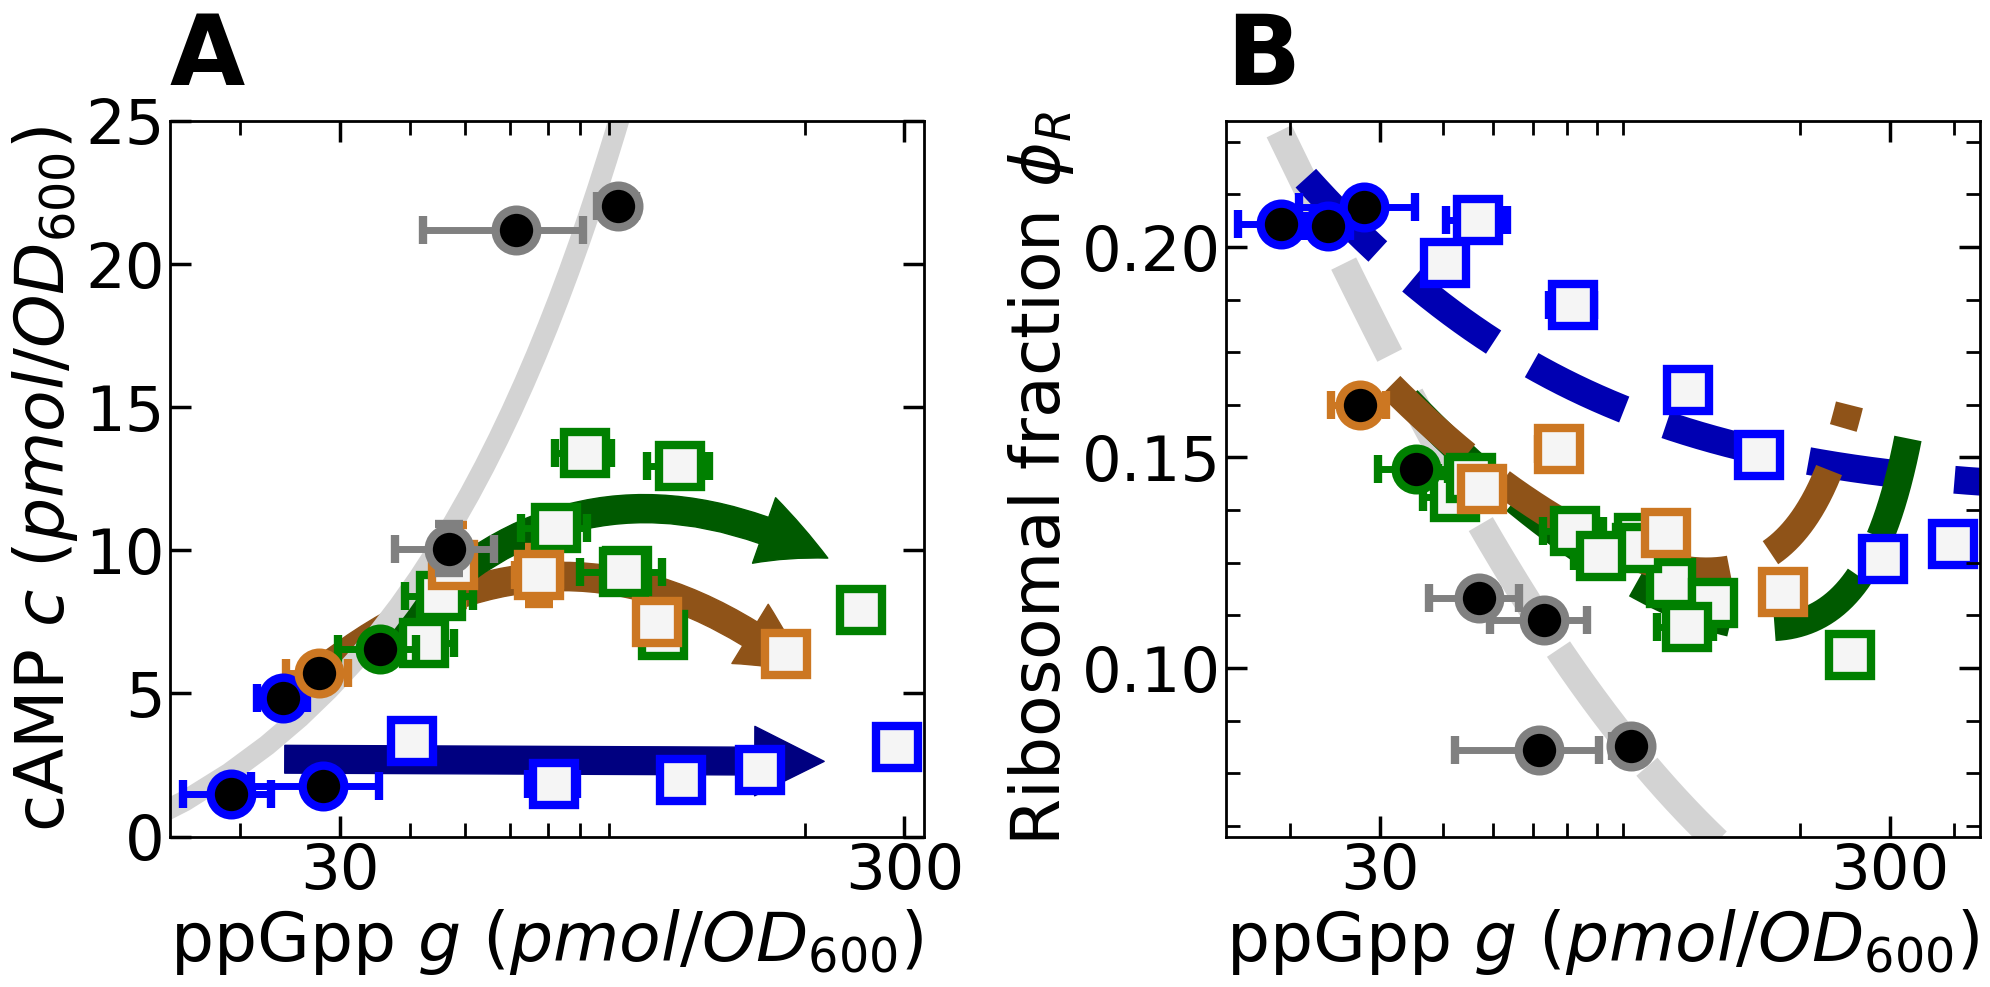

In [62]:
fig, axs = plt.subplots(1,2,figsize=(2*figw,2.5*figh))
ax1, ax3 = axs.flat
g=np.linspace(0.01,315,100)

ax1.text(0., 1.05, 'A', transform=ax1.transAxes, 
            size=font*2.5, weight='bold')
ax1.plot(g, q_wt +m_wt * g, color='lightgrey', linewidth=15, zorder=-1)

lent=180
arrow_width=3
arrow_glu = FancyArrowPatch((x_p_glu_cnt, y_p_glu_cnt), (x_p_glu_cnt+(lent+15), y_p_glu_cnt+m_glu_cnt*(lent+15)), mutation_scale=100, color=darken_color(color_dict['glucose'], 0.5), zorder=-2)
ax1.add_patch(arrow_glu)
arrow_suc = FancyArrowPatch((x_p_suc_cnt, y_p_suc_cnt), (x_p_suc+lent-15, quadratic_pred_suc(x_p_suc_cnt+lent-15)),  connectionstyle="arc3,rad=-.4", mutation_scale=100, color=darken_color(color_dict['succinate']), zorder=-2)
ax1.add_patch(arrow_suc)
arrow_gly = FancyArrowPatch((x_p_gly_cnt, y_p_gly_cnt), (x_p_gly+lent, quadratic_pred_gly(x_p_gly_cnt+lent)), connectionstyle="arc3,rad=-.4", mutation_scale=100, color=darken_color(color_dict['glycerol']), zorder=-2)
ax1.add_patch(arrow_gly)


for idx, row in merged_wt.iterrows():
    ax1.errorbar(row['mean_ppgpp'], row['mean_camp'],
                 xerr=row['err_ppgpp'], yerr=row['err_camp'],
                 #label='WT' if idx == 1 else "", #add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15*2, markeredgewidth=3*2, zorder=1,
                 capsize=2*cap, elinewidth=eline)
for idx, row in merged_rela.iterrows():
    ax1.errorbar(row['mean_ppgpp'], row['mean_camp'],
                 xerr=row['err_ppgpp'], yerr=row['err_camp'],
                 #label='RelA' if idx == 1 else "",  
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=rela_marker, markerfacecolor=rela_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15*2, markeredgewidth=3*2, zorder=0,
                 capsize=2*cap, elinewidth=eline)
ax1.set_xlabel('ppGpp $g \ (pmol/OD_{600})$', fontsize=1.75*font)
ax1.set_ylabel('cAMP $c \ (pmol/OD_{600})$', fontsize=1.75*font)
ax1.tick_params(labelsize=label, axis='both')
ax1.set_ylim(0,25)
ax1.set_xlim(15,325)
ax1.tick_params(labelsize=2*label)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(MultipleLocator(25))
ax1.set_xscale('log')

g=np.linspace(0,500,1000)
ax3.text(0., 1.05, 'B', transform=ax3.transAxes, 
            size=font*2.5, weight='bold')
ax3.plot(g, y_wt, color='lightgrey', linestyle='--', linewidth=20, zorder=-2)

# Plot the other lines from their intersection points
if intersect_glu_x is not None:
    ax3.plot(g[g >= intersect_glu_x_cnt], y_glu_cnt[g >= intersect_glu_x_cnt], color=darken_color(color_dict['glucose'], 0.3), linestyle='--', linewidth=20, zorder=-2)
if intersect_gly_x is not None:
    ax3.plot(g[(g >= intersect_gly_x_cnt)&(g<=330)], y_gly_quad[(g >= intersect_gly_x_cnt)&(g<=330)], color=darken_color(color_dict['glycerol'], 0.3), linestyle='--', linewidth=20, zorder=-2)
if intersect_suc_x is not None:
    ax3.plot(g[(g >= intersect_suc_x_cnt)&(g<=250)], y_suc_quad[(g >= intersect_suc_x_cnt)&(g<=250)], color=darken_color(color_dict['succinate'], 0.3), linestyle='--', linewidth=20, zorder=-2)
for idx, row in milan_ppgpp_data_wt.iterrows():
    ax3.errorbar(row['Concentration'], phir(row['Growth Rate']),
                 xerr=row['Concentration Error'],
                 label='WT' if idx == 1 else "",  # Add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=wt_marker, markerfacecolor=wt_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15*2, markeredgewidth=3*2, zorder=1,
                 capsize=2*cap, elinewidth=eline)
for idx, row in milan_ppgpp_data_relA.iterrows():
    ax3.errorbar(row['Concentration'], phir(row['Growth Rate']),
                 xerr=row['Concentration Error'],
                 label='RelA' if idx == 1 else "",  # Add label once
                 ecolor=color_dict[row['Carbon Source']], fmt=' ', marker=rela_marker, markerfacecolor=rela_face,
                 markeredgecolor=color_dict[row['Carbon Source']], markersize=15*2, markeredgewidth=3*2, zorder=0,
                 capsize=2*cap, elinewidth=eline)

ax3.set_xlabel('ppGpp ' r'$ g\ (pmol/OD_{600})$', fontsize=1.75*font)
ax3.set_ylabel('Ribosomal fraction $\phi_R$', fontsize=1.75*font)
ax3.tick_params(axis='both', labelsize=2*label)
ax3.tick_params(axis='both', which='major', width=2.5, length=15, direction='in')
ax1.tick_params(axis='both', which='major', width=2.5, length=15, direction='in')
ax2.tick_params(axis='both', which='major', width=2.5, length=15, direction='in')
ax3.tick_params(axis='both', which='minor', width=2, length=10, direction='in')
ax1.tick_params(axis='both', which='minor', width=2, length=10, direction='in')
ax3.yaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax3.set_ylim(0.06, 0.23)
ax3.set_xlim(15,450)
ax3.set_xscale('log')
ax3.yaxis.set_minor_locator(MultipleLocator(0.0125))
ax3.yaxis.set_major_locator(MultipleLocator(0.05))
for spine in ax1.spines.values():
    spine.set_linewidth(2)
for spine in ax3.spines.values():
    spine.set_linewidth(2)
ax3.set_xticks([30,300])
ax1.set_xticks([30,300])
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.savefig('images/figure3_AB_quad.svg')
plt.savefig('images/figure3_AB_quad.pdf')
plt.show()

In [63]:
font=20
label=15

### Use promoter strengths to plot $\phi_R$ in 3D as a function of ppGpp and cAMP

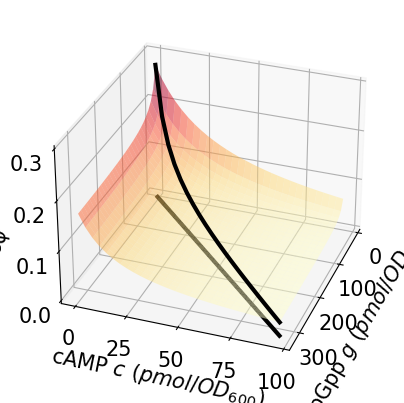

In [64]:
from mpl_toolkits.mplot3d import axes3d
g=np.linspace(-q_wt/m_wt,g_0*3,500)
c=g*m_wt+q_wt-(g*m_wt+q_wt)*((g*m_wt+q_wt)<0)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
c_reduced = np.linspace(c.min(), c.max(), 30)
g_reduced = np.linspace(g.min(), g.max(), 30)
G, C = np.meshgrid(g_reduced, c_reduced)
conc_wt_reduced = np.column_stack((G.ravel(), C.ravel()))
ratios_wt_reduced = [fit(output.beta, row) for row in conc_wt_reduced]
ribosomal_reduced = np.array([compute_fraction(row2, phi_max) for row2 in ratios_wt_reduced])

ribosomal_reduced = ribosomal_reduced.reshape(G.shape)
g_line = np.linspace(g.min(), g.max(), 20)
wt_c_line = m_wt * g_line + q_wt
Z_vals = np.array([compute_fraction(fit(output.beta, (g_val, y_val)), phi_max) for g_val, y_val in zip(g_line, wt_c_line)])
X, Y = np.meshgrid(g_reduced, c_reduced)
ax.plot_surface(X, Y, ribosomal_reduced, cmap='YlOrRd', alpha=0.5)
# ax.contour3D(X, Y, ribosomal_reduced, 50, cmap='YlOrRd', linestyles="-", linewidth=0.5, zorder=-1)
ax.plot(g_line, wt_c_line, Z_vals, color='black', label="WT", zorder=5, linewidth=3)
ax.plot(g_line, wt_c_line, 0, color='black', label="WT", zorder=-1, linewidth=3)
ax.view_init(azim=20)
ax.set_xlabel('ppGpp $g\ (pmol/OD_{600})$', fontsize=15)
ax.set_ylabel('cAMP $c\ (pmol/OD_{600})$', fontsize=15)
ax.set_zlabel('$\phi_R$', fontsize=15)
ax.tick_params(labelsize=15)
ax.set_zticks([0,0.1,0.2,0.3])
#ax.contour(X, Y, ribosomal_reduced, zdir='z', offset=0, levels=10, cmap="coolwarm", linestyles="solid")
#plt.tight_layout()
plt.savefig('images/3dplot.svg')
plt.show()

## Transcriptional competition: gene dosage effects. 

**Dosage factor (disadvantage of metabolic promoters with respect to ribosomal promoters)**

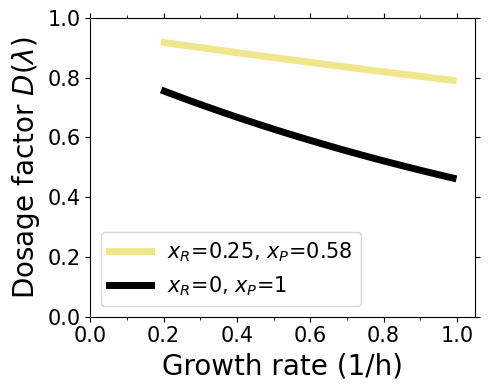

In [65]:
l=np.linspace(0,2,100)
plt.figure(figsize=(figw/2,figh))
ours = (l>0.2) & (l<1)
plt.ylim(0,1)
plt.plot(l[ours], correction(l[ours],xp_estimate)/correction(l[ours],xr_estimate), linewidth=5, color='khaki', label='$x_R$=0.25, $x_P$=0.58')
plt.plot(l[ours], correction(l[ours],1)/correction(l[ours],0), linewidth=5, color='black', label='$x_R$=0, $x_P$=1')
plt.xlim(0,1.05)
plt.ylabel('Dosage factor $D(\lambda)$', fontsize=font)
plt.xlabel('Growth rate (1/h)', fontsize=font)
plt.tick_params(labelsize=label)
plt.gca().xaxis.set_ticks_position('both')
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.1))
plt.gca().yaxis.set_ticks_position('both')
plt.legend(fontsize=label)
plt.tight_layout()
plt.savefig('images/relative_gene_abundance.svg')
plt.savefig('images/relative_gene_abundance.pdf')

## Fit with gene dosage effects

In [66]:
correction_flag=True
phi_max=0.45
xR = xr_estimate
xP = xp_estimate

from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import norm
from scipy.odr import ODR, Model, RealData
from scipy.stats import t


def equation(x, ratio, phimax):
    return 1+ratio*L_p/L_r*(correction(growthrate(x), xP)/correction(growthrate(x), xR))- phimax/x  #needed if correction_flag

def compute_ratio(gr,phimax):
    if correction_flag==True:
        return (phimax/(phir(gr))-1)*correction(gr, xR)/correction(gr, xP)*L_r/L_p  #computes the ratio beta_P/beta_R from the growth rate gr

    if correction_flag==False:   
        return (phimax/phir(gr)-1)*L_r/L_p

def compute_fraction(ratio, phimax):   # Computes ribosomal mass fraction from promoter strength ratio betaP/betaR
    if correction_flag==True:   
        initial_guess = phimax / (1 + ratio * L_p / L_r) 
        return fsolve(equation, initial_guess, args=(ratio, phimax))  #to keep into account gene copy number

    if correction_flag==False:
        return phimax / (1 + ratio * L_p / L_r)

def err_prop(gr, gr_err, phimax):  
    return phimax*slope_zhu*0.76*gr_err/(phir(gr))**2  


def betaP(eps0, eps):
    return 1+eps/eps0

def betaR(gpoint, ppgpp):
    return 1+gpoint/ppgpp

def fit(parametri, var):
    eps=var[1]
    g=var[0]
    gpoint=parametri[0]
    eps0=parametri[1]
    eps1=parametri[2]
    y=eps1*betaP(eps0, eps)/betaR(gpoint, g)
    return y          #returns ratio kP/kR

condition_glu = (complete_merged['Carbon Source'] == 'glucose')
condition_suc = (complete_merged['Carbon Source'] == 'succinate')
condition_gly = (complete_merged['Carbon Source'] == 'glycerol')
condition_others = (complete_merged['Carbon Source'] == 'glutamate')|(complete_merged['Carbon Source'] == 'aspartate')|(complete_merged['Carbon Source'] == 'acetate')
condition = (condition_glu|condition_suc|condition_gly|condition_others)
conc=(complete_merged['mean_ppgpp'][condition], complete_merged['mean_camp'][condition]) 
conc_errors = (complete_merged['err_ppgpp'][condition], complete_merged['err_camp'][condition])
yps = compute_ratio(complete_merged['mean_GR_x'][condition], phi_max)

data = RealData(conc, yps, sx=conc_errors, sy=err_prop(complete_merged['mean_GR_x'], complete_merged['err_GR_x'], phi_max)) 


model = Model(fit)


odr = ODR(data, model, beta0=[40, 3, 3])


output_gd = odr.run()  #gene dosage-included model fitted parameters



print(f'res_var: {output.res_var}')

for parameter_name, value in zip(['g0', 'eps0', 'eps1'], output_gd.beta):
    print(f'{parameter_name}: {value}')




res_var: 1.74432407394882
g0: 19.252099377115
eps0: 14.141123087083669
eps1: 0.9831141305347607


### Goodness of fit:

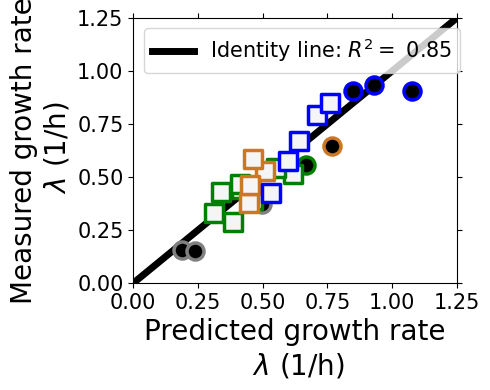

In [67]:
from sklearn.linear_model import LinearRegression
fig = plt.figure(figsize=(figw/2, figh))

# Collect data points
x_vals = []
y_vals = []

for _, row in complete_merged[condition].loc[complete_merged[condition]['strain'] == 'WT'].iterrows():
    y = row['mean_GR_x']
    x = growthrate(compute_fraction(fit(output_gd.beta, (conc[0][row.name], conc[1][row.name])), phi_max))
    x_vals.append(x)  # Flip x and y
    y_vals.append(y)  # Flip x and y
    plt.scatter(x, y, edgecolor=color_dict[row['Carbon Source']],  # Flip x and y
                marker=wt_marker, facecolor=wt_face, linewidth=2.5, s=150)

for _, row in complete_merged[condition].loc[complete_merged[condition]['strain'] == 'pTetRelA'].iterrows():
    y = row['mean_GR_x']
    x = growthrate(compute_fraction(fit(output_gd.beta, (conc[0][row.name], conc[1][row.name])), phi_max))
    x_vals.append(x)  # Flip x and y
    y_vals.append(y)  # Flip x and y
    plt.scatter(x, y, edgecolor=color_dict[row['Carbon Source']],  # Flip x and y
                marker=rela_marker, facecolor=rela_face, linewidth=2.5, s=150)

# Convert lists to numpy arrays
x_vals = np.array(x_vals)  # No need to reshape
y_vals = np.array(y_vals)

# Predicted y values assuming y = x
y_pred_identity = x_vals  # The predicted y is just equal to x in this case

# Calculate R^2 for the identity line (slope = 1, intercept = 0)
ss_total = np.sum((y_vals - np.mean(y_vals))**2)  # Total sum of squares
ss_residual = np.sum((y_vals - y_pred_identity[:,0])**2)  # Residual sum of squares
r_squared_identity = 1 - (ss_residual / ss_total)  # R^2 for the identity fit

# Plot identity line
plt.plot(x_bis, x_bis, color='black', linewidth=5, zorder=0, label=f"Identity line: $R^2=$ {r_squared_identity:.2f}")

# Labels and limits
plt.xlim(0, 1.25)
plt.ylim(0, 1.25)
plt.xticks([0,0.25,0.5,0.75,1,1.25])
plt.yticks([0,0.25,0.5,0.75,1,1.25])
plt.xlabel('Predicted growth rate\n $\lambda$ (1/h)', fontsize=font)
plt.ylabel('Measured growth rate\n $\lambda$ (1/h)', fontsize=font)
plt.tick_params(labelsize=label)
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.legend(fontsize=label, loc='upper left')
plt.tight_layout()
plt.show()

## Fit according to the regulon-based model

In [68]:
correction_flag=True
xR=xr_estimate
xP=x_camp_activated
Lr=L_r
Lp=L_camp_act
phi_max=0.26       #phi_max must be reduced (see sum of regulon based sectors)

from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import norm
from scipy.odr import ODR, Model, RealData

#we can also try a version including degradation rates
def equation(x, ratio, phimax):
    return 1+ratio*Lp/Lr*(correction(inverse_gl_ribo(x), xP)/correction(inverse_gl_ribo(x), xR))- phimax/x  #needed if correction_flag

def compute_ratio(gr,phimax):
    if correction_flag==True:
        return (phimax/(restricted_gl_ribo(gr))-1)*correction(gr, xR)/correction(gr, xP)*Lr/Lp  #computes the ratio k_P/k_R from the growth rate gr
    
    if correction_flag==False:   
        return (phimax/restricted_gl_ribo(gr)-1)*Lr/Lp
    
def compute_fraction(ratio, phimax):   # Computes ribosomal mass fraction from promoter AFFINITY ratio kP/kR
    if correction_flag==True:   
        initial_guess = phimax / (1 + ratio * Lp / Lr) 
        return fsolve(equation, initial_guess, args=(ratio, phimax))  #to keep into account gene copy number
    
    if correction_flag==False:
        return phimax / (1 + ratio * Lp / Lr)

def err_prop(gr, gr_err, phimax):  #growth rate uncertainty propagation through the ratio formula
    return phimax*slope_zhu*0.76*gr_err/(restricted_gl_ribo(gr))**2   


def kP(eps0, eps):
    return 1+eps/eps0

def kR(gpoint, ppgpp):
    return 1+gpoint/ppgpp

def fit(parametri, var):
    eps=var[1]
    g=var[0]
    gpoint=parametri[0]
    eps0=parametri[1]
    eps1=parametri[2]
    y=eps1*kP(eps0, eps)/kR(gpoint, g)
    return y          #returns ratio kP/kR

condition_glu = (complete_merged['Carbon Source'] == 'glucose')
condition_suc = (complete_merged['Carbon Source'] == 'succinate')
condition_gly = (complete_merged['Carbon Source'] == 'glycerol')
condition_others = (complete_merged['Carbon Source'] == 'glutamate')|(complete_merged['Carbon Source'] == 'aspartate')|(complete_merged['Carbon Source'] == 'acetate')
condition = (condition_glu|condition_suc|condition_gly|condition_others)
conc=(complete_merged['mean_ppgpp'][condition], complete_merged['mean_camp'][condition]) 
conc_errors = (complete_merged['err_ppgpp'][condition], complete_merged['err_camp'][condition])
yps = compute_ratio(complete_merged['mean_GR_x'][condition], phi_max)

data = RealData(conc, yps, sx=conc_errors, sy=err_prop(complete_merged['mean_GR_x'], complete_merged['err_GR_x'], phi_max)) 


model = Model(fit)


odr = ODR(data, model, beta0=[40, 3, 3])


output_rb = odr.run()  #regulon based fitted parameters



for parameter_name, value in zip(['g0', 'eps0', 'eps1'], output_rb.beta):
    print(f'{parameter_name}: {value}')




g0: 22.313593384543385
eps0: 13.173422210826605
eps1: 0.8349701044362043


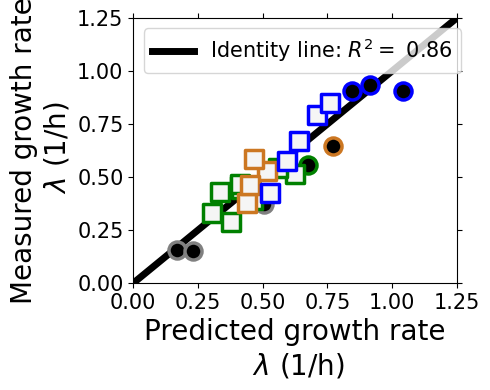

In [69]:
from sklearn.linear_model import LinearRegression
fig = plt.figure(figsize=(figw/2, figh))

# Collect data points
x_vals = []
y_vals = []

for _, row in complete_merged[condition].loc[complete_merged[condition]['strain'] == 'WT'].iterrows():
    y = row['mean_GR_x']
    x = inverse_gl_ribo(compute_fraction(fit(output_rb.beta, (conc[0][row.name], conc[1][row.name])), phi_max))
    x_vals.append(x)  # Flip x and y
    y_vals.append(y)  # Flip x and y
    plt.scatter(x, y, edgecolor=color_dict[row['Carbon Source']],  # Flip x and y
                marker=wt_marker, facecolor=wt_face, linewidth=2.5, s=150)

for _, row in complete_merged[condition].loc[complete_merged[condition]['strain'] == 'pTetRelA'].iterrows():
    y = row['mean_GR_x']
    x = inverse_gl_ribo(compute_fraction(fit(output_rb.beta, (conc[0][row.name], conc[1][row.name])), phi_max))
    x_vals.append(x)  # Flip x and y
    y_vals.append(y)  # Flip x and y
    plt.scatter(x, y, edgecolor=color_dict[row['Carbon Source']],  # Flip x and y
                marker=rela_marker, facecolor=rela_face, linewidth=2.5, s=150)

# Convert lists to numpy arrays
x_vals = np.array(x_vals)  # No need to reshape
y_vals = np.array(y_vals)

# Predicted y values assuming y = x
y_pred_identity = x_vals  # The predicted y is just equal to x in this case

# Calculate R^2 for the identity line (slope = 1, intercept = 0)
ss_total = np.sum((y_vals - np.mean(y_vals))**2)  # Total sum of squares
ss_residual = np.sum((y_vals - y_pred_identity[:,0])**2)  # Residual sum of squares
r_squared_identity = 1 - (ss_residual / ss_total)  # R^2 for the identity fit

# Plot identity line
plt.plot(x_bis, x_bis, color='black', linewidth=5, zorder=0, label=f"Identity line: $R^2=$ {r_squared_identity:.2f}")

# Labels and limits
plt.xlim(0, 1.25)
plt.ylim(0, 1.25)
plt.xticks([0,0.25,0.5,0.75,1,1.25])
plt.yticks([0,0.25,0.5,0.75,1,1.25])
plt.xlabel('Predicted growth rate\n $\lambda$ (1/h)', fontsize=font)
plt.ylabel('Measured growth rate\n $\lambda$ (1/h)', fontsize=font)
plt.tick_params(labelsize=label)
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.legend(fontsize=label, loc='upper left')
plt.tight_layout()
plt.show()

### We can check the fitted regulatory activity reproduces data on expression of constitutive promoters

In [70]:
#we repeat the procedure we used to find regulatory activities, this time including gene dosage effects
phi_max=0.45
g=np.linspace(-q_wt/m_wt,g_0*3,500)
c=g*m_wt+q_wt-(g*m_wt+q_wt)*((g*m_wt+q_wt)<0)
gzero=output_gd.beta[0]
epszero=output_gd.beta[1]
epsone=output_gd.beta[2]
conc_wt=np.column_stack((g, c))
ratios_wt = [fit(output_gd.beta, row) for row in conc_wt]
ribosomal_gd = np.array([compute_fraction(row2, phi_max) for row2 in ratios_wt])
ribosomal_gd=ribosomal_gd.reshape(-1,1)
gr_gd=dai_gl(ribosomal_gd)
thetaPvalues_gd=np.linspace(0,1,len(g))
thetaRvalues_gd=np.linspace(0,1,len(g))

for i, gg in enumerate(g):
    thetaRvalues_gd[i] = betaR(gzero, g)[i]*correction(gr_gd, xr_estimate)[i]    #regulatory activities including gene dosage effects
    thetaPvalues_gd[i] = epsone*betaP(epszero, c)[i]*correction(gr_gd, xp_estimate)[i]    #regulatory activities including gene dosage effects

In [71]:
thetaPvalues_gd=thetaPvalues_gd.reshape(-1,1)
thetaRvalues_gd=thetaRvalues_gd.reshape(-1,1)

In [72]:
g=np.linspace(-q_wt/m_wt,g_0*3,500)
c=g*m_wt+q_wt-(g*m_wt+q_wt)*((g*m_wt+q_wt)<0)
phi_max=0.26
gzero_rstc=output_rb.beta[0]
epszero_rstc=output_rb.beta[1]
epsone_rstc=output_rb.beta[2]
conc_wt=np.column_stack((g, c))
ratios_wt = [fit(output_rb.beta, row) for row in conc_wt]
ribosomal_rb = np.array([compute_fraction(row2, phi_max) for row2 in ratios_wt])
ribosomal_rb=ribosomal_rb.reshape(-1,1)
thetaPvalues_rb=np.linspace(0,1,len(g))
thetaRvalues_rb=np.linspace(0,1,len(g))
gr_rb = inverse_gl_ribo(ribosomal_rb)
for i, gg in enumerate(g):
    thetaRvalues_rb[i] = betaR(gzero_rstc, g)[i]*correction(gr_rb, xR)[i]
    thetaPvalues_rb[i] = epsone_rstc*betaP(epszero_rstc, c)[i]*correction(gr_rb, xP)[i]

In [73]:
thetaPvalues_rb=thetaPvalues_rb.reshape(-1,1)
thetaRvalues_rb=thetaRvalues_rb.reshape(-1,1)

### Protein concentration varies with growth rate - and we must consider this when looking at lacZ data

In [74]:
prot_cn=pd.read_csv('data/prot_conc.csv', header=0)     #protein concentration vs growth rate from balakrishnan et al
prot_cn

,Growth rate,protein concentration
0,1.264045,4.048583
1,0.971910,4.190283
2,0.696629,4.352227
3,0.449438,4.574899
4,0.421348,4.736842


In [75]:
#fit protein concentration vs growth rate (increases at slow growth)
coeffs_prot_cn=np.polyfit(prot_cn['Growth rate'], prot_cn[' protein concentration'], deg=1)
prot_cn_gl = np.poly1d(coeffs_prot_cn)
ref_prot_cn=prot_cn_gl(0.9)

### Load datasets with constitutive promoter expression. From Balakrishnan 2022 and Zhang 2020

In [76]:
constitutive_bala = pd.read_csv('data/constitutive_balakrishnan.csv') #load expression of constitutive promoters from balakrishnan2022
bala_data=pd.read_csv('data/total_reg_act_bala.csv') #load total regulatory activity from Balakrishnan paper 
essQ=bala_data.loc[bala_data['locus']==' essQ']
nth=bala_data.loc[bala_data['locus']==' nth']
ravA=bala_data.loc[bala_data['locus']==' ravA']
atpI=bala_data.loc[bala_data['locus']==' atpI']
zhang = pd.read_csv('data/constitutive_sclavi.csv')#load expression of constitutive promoters from sclavi 2020
pltet= zhang.loc[zhang['Promoter']=='PL']
fc = correction(pltet['Growth rate']*np.log(2), find_position(356850))/pltet['expression'] #fc in expression of the pltet promoter
fc = fc / min(fc)

### Total regulatory activity extracted from the expression of constitutive promoteters (fold change)

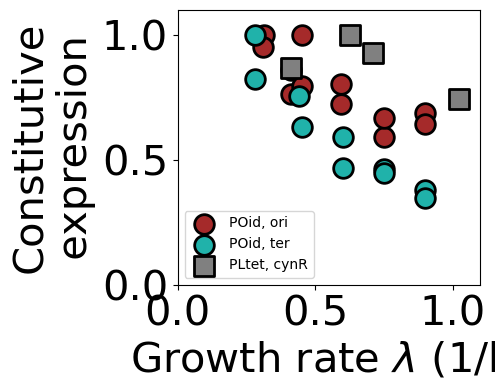

In [77]:
plt.figure(figsize=(figw/2, figh))
plt.scatter(constitutive_bala.loc[constitutive_bala['locus']=='ori']['growth rate'], constitutive_bala.loc[constitutive_bala['locus']=='ori']['concentration']/max(constitutive_bala.loc[constitutive_bala['locus']=='ori']['concentration']), color='brown', s=200, edgecolor='black', linewidth=2, label='POid, ori')
plt.scatter(constitutive_bala.loc[constitutive_bala['locus']=='ter']['growth rate'], constitutive_bala.loc[constitutive_bala['locus']=='ter']['concentration']/max(constitutive_bala.loc[constitutive_bala['locus']=='ter']['concentration']), color='lightseagreen', s=200, edgecolor='black', linewidth=2, label='POid, ter')
plt.scatter(pltet['Growth rate']*np.log(2), pltet['expression']/max(pltet['expression']), color='grey', s=200, edgecolor='black', linewidth=2, label='PLtet, cynR', marker='s')
plt.legend(fontsize=font*0.5)
plt.ylim(0,1.1)
plt.tick_params(labelsize=font*1.5)
plt.xlim(0,1.1)
plt.xticks([0,0.5,1])
plt.xlabel('Growth rate $\lambda$ (1/h)', fontsize=font*1.5)
plt.ylabel('Constitutive\n expression ', fontsize=font*1.5)
plt.tight_layout()
plt.savefig('images/constitutive_expression.svg')

### Find regulatory activity (see modeling details for the formula)

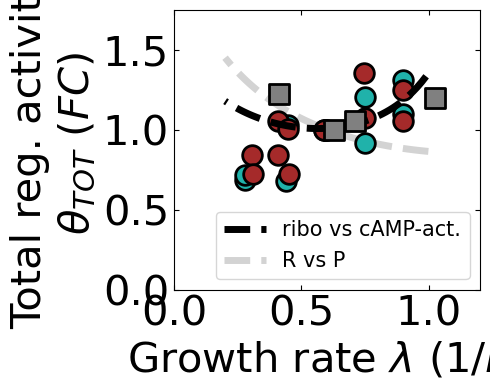

In [78]:
plt.figure(figsize=(figw/2,figh))
#regulatory activity for the regulon based model
interval=(inverse_gl_ribo(ribosomal_rb)>0.2) & (inverse_gl_ribo(ribosomal_rb)<1)#interval we our data points fall
reg_act_rb = (L_camp_act*thetaPvalues_rb/(restricted_gl_cact(gr_rb))*
             ((1-restricted_gl_max(gr_rb))/L_q_redef+restricted_gl_ribo(gr_rb)/L_r+restricted_gl_cact(gr_rb)/L_camp_act))

#find normalization constant at lambda=0.6 h-1
index_norm=np.where(inverse_gl_ribo(ribosomal_rb) > 0.6)[0][-1] #find the index corresponding to the midpoint of the interval of interest
norm_rb = ((L_camp_act*thetaPvalues_rb[index_norm]/(restricted_gl_cact(0.6)))
           *((1-restricted_gl_max(0.6))/L_q_redef+restricted_gl_ribo(0.6)/L_r+restricted_gl_cact(0.6)/L_camp_act))


plt.plot(inverse_gl_ribo(ribosomal_rb)[interval], (reg_act_rb/norm_rb)[interval], linewidth=5, color='black', linestyle='--', label='ribo vs cAMP-act.')

#regulatory activity for the gene dosage model
phi_max=0.45
interval=(dai_gl(ribosomal_gd)>0.2) & (dai_gl(ribosomal_gd)<1)
reg_act_gd=(((L_p*thetaPvalues_gd/(phi_max-ribosomal_gd))
             *(phi_max/L_q+ribosomal_gd/L_r+(phi_max-ribosomal_gd)/L_p)/phi_max))

#find normalization constant at lambda=0.6 h-1
index_norm= np.where(dai_gl(ribosomal_gd)>0.6)[0][-1]  #find the index corresponding to the midpoint of the interval of interest
norm_gd = ((L_p*thetaPvalues_gd/(phi_max-ribosomal_gd))*(phi_max/L_q+ribosomal_gd/L_r+(phi_max-ribosomal_gd)/L_p)/phi_max)[index_norm]#find the norm. constant

plt.plot(dai_gl(ribosomal_gd)[interval], (reg_act_gd/norm_gd)[interval], linewidth=5, color='lightgrey', linestyle='--', zorder=-2, label='R vs P')


plt.scatter(pltet['Growth rate']*np.log(2), fc, color='grey', s=200, edgecolor='black', marker='s', zorder=5, linewidth=2)
plt.scatter(essQ['Growth rate'], essQ['K']/essQ['K'][2], color='lightseagreen', edgecolor='black', s=200, linewidth=2)
plt.scatter(nth['Growth rate'], nth['K']/nth['K'][7], color='lightseagreen', edgecolor='black', marker='o', s=200, linewidth=2)
plt.scatter(ravA['Growth rate'], ravA['K']/ravA['K'][13], color='brown', edgecolor='black', s=200, linewidth=2)
plt.scatter(atpI['Growth rate'], atpI['K']/atpI['K'][19], color='brown', edgecolor='black', marker='o', s=200, linewidth=2)
plt.ylabel('Total reg. activity\n'r' $\theta_{TOT}\ (FC)$', fontsize=font*1.5)
plt.xlabel('Growth rate $\lambda\  (1/h)$', fontsize=font*1.5)
plt.tick_params(labelsize=font*1.5, top=True, right=True, direction='in')
plt.yticks([0,0.5,1,1.5,2])
plt.xticks([0,0.5,1])
plt.legend(fontsize=label, loc='lower right')
plt.xlim(0,1.2)
plt.ylim(0,1.75)
plt.tight_layout()
plt.savefig('images/total_reg_activity.svg')
plt.show()

# ------------------Elongation rate and active ribosomes--------------------

In [79]:
eps_max=22*3600/(7336*1.67) #according to dai

phi_0e = 0.11*0.76 #according to dai
def epsilon(Phir):
    return eps_max*Phir/(Phir+phi_0e)   #gives elongation rate as a function of phi_R
def compute_fa(gr):
    return gr/(phir_dai(gr)*epsilon(phir_dai(gr))) #this is always true because we use the definition of f_a

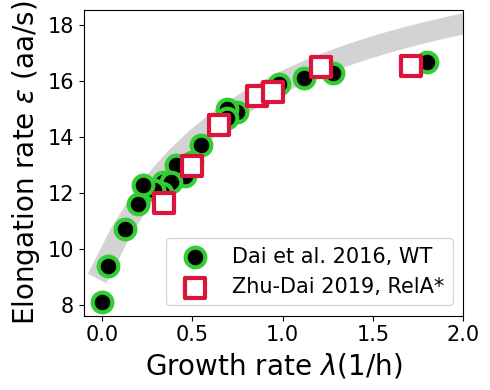

In [80]:
zhu_elong=pd.read_csv('data/Zhu2019-figS3B.csv')#elongation rate data vs growth rate from zhu2019 (rela overexpression)

dai_elong=pd.read_csv('data/dai2016_elong.txt')#elongation rate data vs growth rate from dai2016

fig, ax1 = plt.subplots(figsize=(figw/2, figh))

plt.scatter(dai_elong['Growth rate (1/h)'], dai_elong['Translational elongation rate (aa/s)'], color='black', s=200, label='Dai et al. 2016, WT', edgecolor='limegreen', linewidth=3)

plt.scatter(zhu_elong['Growth rate'], zhu_elong['sigma'], s=200, label='Zhu-Dai 2019, RelA*', color='white', edgecolor='crimson', linewidth=3, marker=rela_marker, zorder=3)

l=np.linspace(0,2,20)

plt.plot(l, epsilon(phir_dai(l))*7336*1.67/3600, linewidth=15, color='lightgrey', zorder=-1)

plt.xlim(0,2)

plt.ylabel('Elongation rate $\epsilon$ (aa/s)', fontsize=font)

plt.xlabel('Growth rate $\lambda$(1/h)', fontsize=font)

plt.legend(loc='lower right', fontsize=15)

plt.tick_params(labelsize=label)

plt.xlim(-0.1,2)

plt.tight_layout()

plt.savefig('images/elongation_wtrela.pdf')

plt.savefig('images/elongation_wtrela.svg')

g_0=[73.45047013]


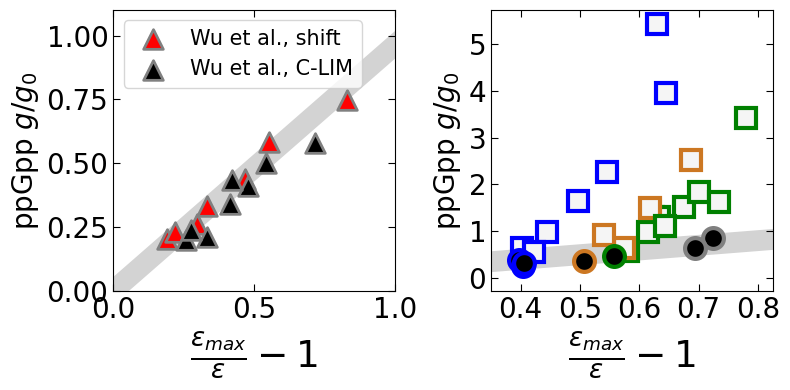

In [81]:
phir_wt=phir_dai(milan_ppgpp_data_wt['Growth Rate'])
phir_glu=phir_dai(data_relA_glu['Growth Rate'])
phir_gly=phir_dai(data_relA_gly['Growth Rate'])
phir_suc=phir_dai(data_relA_suc['Growth Rate'])


regression_model = LinearRegression(fit_intercept=False)          #we fit elongation rate(ppGpp) relationship in our data
g_wt=milan_ppgpp_data_wt['Concentration']
xaxis=1/(phir_wt/(phir_wt+phi_0e))-1
xaxis= xaxis.array.reshape(-1,1)
g_wt=g_wt.array.reshape(-1,1)
regression_model.fit(xaxis,g_wt)
x=np.linspace(0,1,30)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(figw/1.25,figh))
ax2.plot(x, x, color='lightgrey', linewidth=15, linestyle='-', zorder=0)

print(f'g_0={regression_model.coef_[0]}')                                        
g0elongation = regression_model.coef_[0]  #value of the reference concentration g0


for idx, row in milan_ppgpp_data_wt.iterrows():
    ax2.errorbar(eps_max/epsilon(phir_dai(row['Growth Rate']))-1, row['Concentration']/g0elongation, yerr=row['Concentration Error']/g_0,
                 markeredgecolor=color_dict[row['Carbon Source']], marker=wt_marker, markerfacecolor=wt_face,
                markersize=15, zorder=1, fmt='', capsize=cap, ecolor=color_dict[row['Carbon Source']], markeredgewidth=3)
for idx, row in milan_ppgpp_data_relA.iterrows():
    ax2.errorbar(eps_max/epsilon(phir_dai(row['Growth Rate']))-1, row['Concentration']/g0elongation, yerr=row['Concentration Error']/g_0,
                 markeredgecolor=color_dict[row['Carbon Source']], marker=rela_marker, markerfacecolor=rela_face,
                markersize=15, zorder=0, fmt='', capsize=cap, ecolor=color_dict[row['Carbon Source']], markeredgewidth=3)

ax2.set_xlabel(r'$\frac{\epsilon_{max}}{\epsilon}-1$', fontsize=27)
ax2.set_ylabel('ppGpp ' r'$g/g_0$', fontsize=font)
ax2.tick_params(axis='both', which='both', labelsize=font, direction='in', top=True, length=5)
ax2.set_xlim(0.35,0.825)
ax2.set_xticks([0.4,0.5,0.6,0.7,0.8])
ax2.set_yticks([0,1,2,3,4,5])
ax2.yaxis.set_ticks_position('both') 


wu_elongation_rates = pd.read_csv('data/wu_elongation_ppgpp_data.csv')   #elongation rates vs ppgpp from wu2022
wu_el_shift = wu_elongation_rates.loc[wu_elongation_rates['Condition']=='shift']
wu_el_CLIM = wu_elongation_rates.loc[wu_elongation_rates['Condition']=='C-LIM']
wu_el_RLIM = wu_elongation_rates.loc[wu_elongation_rates['Condition']=='R-LIM']

wu_el_model = LinearRegression(fit_intercept=False)                  #linear fit ppgpp - eps_max/epsilon-1
x = wu_elongation_rates['xaxis'].values.reshape(-1,1)
y = wu_elongation_rates['relative ppgpp'].values.reshape(-1,1)
wu_el_model.fit(x,y)
slope_wu_el = wu_el_model.coef_[0]
x=np.linspace(0,1,30)
ax1.scatter(wu_el_shift['xaxis'], wu_el_shift['relative ppgpp'], s=200, color='red', edgecolor='grey', marker='^', linewidth=2, label='Wu et al., shift')
ax1.scatter(wu_el_CLIM['xaxis'], wu_el_CLIM['relative ppgpp'], s=200, color='black', edgecolor='grey', marker='^', linewidth=2, label='Wu et al., C-LIM')
ax1.plot(x, wu_el_model.predict(x.reshape(-1,1)), color='lightgrey', linewidth=15, linestyle='-', zorder=0)

ax1.set_xticks([0,0.5,1])
ax1.set_yticks([0,0.25,0.5,0.75,1])
ax1.set_xlim(0,1)
ax1.set_ylim(0,1.1)
ax1.set_xlabel(r'$\frac{\epsilon_{max}}{\epsilon}-1$', fontsize=27)
ax1.set_ylabel('ppGpp ' r'$g/g_0$', fontsize=font)
ax1.tick_params(axis='both', which='both', labelsize=font, direction='in', top=True, length=5)
ax1.yaxis.set_ticks_position('both')
ax1.legend(fontsize=label, loc='upper left')
plt.tight_layout()
plt.savefig('images/g_epsilon_linear_double.svg')
plt.show()      

### Now we show that rela* activity correlates with doxycycline

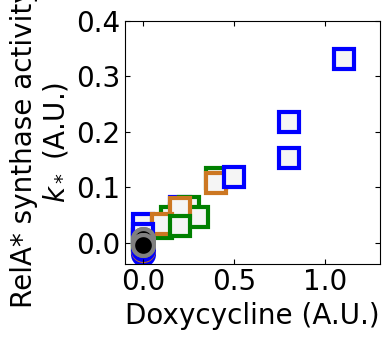

In [82]:
phir_wt=phir_dai(milan_ppgpp_data_wt['Growth Rate'])
phir_glu=phir_dai(data_relA_glu['Growth Rate'])
phir_gly=phir_dai(data_relA_gly['Growth Rate'])
phir_suc=phir_dai(data_relA_suc['Growth Rate'])

def compute_kstar(gr,ppgpp):
    return gr/eps_max*(ppgpp/g0elongation-(eps_max/epsilon(phir_dai(gr))-1))

regression_model = LinearRegression(fit_intercept=False)
g_wt=milan_ppgpp_data_wt['Concentration']
xaxis=1/(phir_wt/(phir_wt+phi_0e))-1
xaxis= xaxis.array.reshape(-1,1)
g_wt=g_wt.array.reshape(-1,1)
regression_model.fit(xaxis,g_wt)
x=np.linspace(0,1,30)
fig, (ax2) = plt.subplots(1,1,figsize=(4,3.5))
for idx, row in milan_ppgpp_data_wt.iterrows():
    ax2.errorbar(row['Dox'], compute_kstar(row['Growth Rate'], row['Concentration']),
                 markeredgecolor=color_dict[row['Carbon Source']], marker=wt_marker, markerfacecolor=wt_face,
                markersize=15, zorder=1, fmt='', capsize=cap, ecolor=color_dict[row['Carbon Source']], markeredgewidth=3)
for idx, row in milan_ppgpp_data_relA.iterrows():
    ax2.errorbar(row['Dox'], compute_kstar(row['Growth Rate'], row['Concentration']),
                 markeredgecolor=color_dict[row['Carbon Source']], marker=rela_marker, markerfacecolor=rela_face,
                markersize=15, zorder=0, fmt='', capsize=cap, ecolor=color_dict[row['Carbon Source']], markeredgewidth=3)

ax2.set_ylabel('RelA* synthase activity \n'r'$k_*$ (A.U.)', fontsize=20)
ax2.set_xlabel('Doxycycline (A.U.)', fontsize=font)
ax2.tick_params(axis='both', which='both', labelsize=font, direction='in', top=True)
ax2.set_xlim(-0.1,1.3)
ax2.set_yticks([0,0.1,0.2,0.3,0.4])
ax2.yaxis.set_ticks_position('both') 
plt.tight_layout()
plt.savefig('images/relastar_activity.pdf')
plt.show()      

### Divergence in ribosome activity

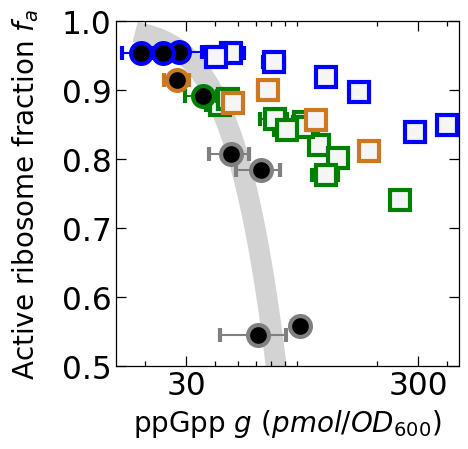

In [83]:
g=np.linspace(20,g_0,100)
conc_wt=np.column_stack((g, q_wt+m_wt*g))

def phir_g_wu(ppgpp):              #gets phir as a function of ppGpp in the wild type using the expression in wu2022
    return 1/(slope*g)             #i.e., phir \propto 1/g (with the slope we get from Zhu2019, or equivalently from Dai2016)


plt.figure(figsize=(figw/2-5.35/127*figw/2,figh*1.15))

for idx, row in milan_ppgpp_data_wt.iterrows():
    plt.errorbar(row['Concentration'], compute_fa(row['Growth Rate']), xerr=row['Concentration Error'],
                 markeredgecolor=color_dict[row['Carbon Source']], marker=wt_marker, markerfacecolor=wt_face,
                markersize=15, zorder=1, fmt='', capsize=cap, ecolor=color_dict[row['Carbon Source']], markeredgewidth=3)
for idx, row in milan_ppgpp_data_relA.iterrows():
    plt.errorbar(row['Concentration'], compute_fa(row['Growth Rate']), xerr=row['Concentration Error'],
                 markeredgecolor=color_dict[row['Carbon Source']], marker=rela_marker, markerfacecolor=rela_face,
                markersize=15, zorder=0, fmt='', capsize=cap, ecolor=color_dict[row['Carbon Source']], markeredgewidth=3)

#in the row below, we use the definition of f_a 
plt.plot(g, dai_gl(phir_g_wu(g))/(phir_g_wu(g)*epsilon(phir_g_wu(g))), color='lightgrey',linestyle='-', linewidth=15, zorder=-3)
plt.xlabel('ppGpp ''$g\ (pmol/OD_{600})$', fontsize=font)
plt.ylabel(r'Active ribosome fraction $f_a$', fontsize=font, labelpad=15)
plt.tick_params(axis='both', labelsize=label*1.5, top=True, right=True, direction='in', width=0.9, length=7.5, which='major')
plt.tick_params(axis='both', labelsize=label*1.5, top=True, right=True, direction='in', width=0.9, length=3.75, which='minor')
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.9)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1])
plt.xlim(15,450)
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks([30,300])
plt.ylim(0.5,1)
plt.tight_layout()
plt.savefig('images/fa_g_linear.svg')
plt.show()

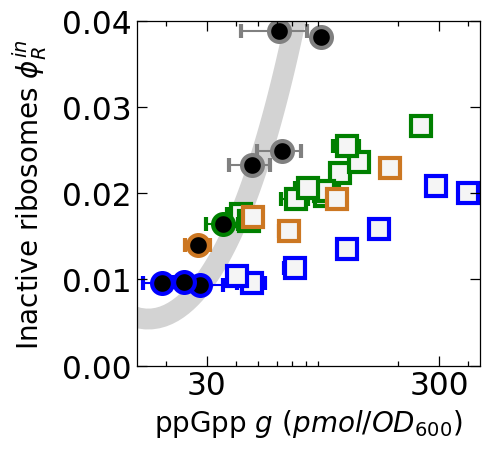

In [84]:
g=np.linspace(6,g_0,100)
conc_wt=np.column_stack((g, q_wt+m_wt*g))
plt.figure(figsize=(figw/2,figh*1.15))
for idx, row in milan_ppgpp_data_wt.iterrows():
    plt.errorbar(row['Concentration'], (1-compute_fa(row['Growth Rate']))*phir_dai(row['Growth Rate']), xerr=row['Concentration Error'],
                 markeredgecolor=color_dict[row['Carbon Source']], marker=wt_marker, markerfacecolor=wt_face,
                markersize=15, zorder=1, fmt='', capsize=cap, ecolor=color_dict[row['Carbon Source']], markeredgewidth=3)
for idx, row in milan_ppgpp_data_relA.iterrows():
    plt.errorbar(row['Concentration'], (1-compute_fa(row['Growth Rate']))*phir_dai(row['Growth Rate']), xerr=row['Concentration Error'],
                 markeredgecolor=color_dict[row['Carbon Source']], marker=rela_marker, markerfacecolor=rela_face,
                markersize=15, zorder=0, fmt='', capsize=cap, ecolor=color_dict[row['Carbon Source']], markeredgewidth=3)
plt.plot(g, (1-compute_fa(dai_gl(phir_g_wu(g)))) * phir_g_wu(g), color='lightgrey',linestyle='-', linewidth=15, zorder=-2)
plt.xlabel('ppGpp ''$g\ (pmol/OD_{600})$', fontsize=font)
plt.ylabel(r'Inactive ribosomes $\phi_R^{in}$', fontsize=font, labelpad=10)
plt.tick_params(axis='both', labelsize=label*1.5, top=True, right=True, direction='in', width=0.9, length=7.5, which='major', zorder=-1)
plt.tick_params(axis='both', labelsize=label*1.5, top=True, right=True, direction='in', width=0.9, length=3.75, which='minor', zorder=-1)
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.9)
plt.yticks([0, 0.01,0.02,0.03, 0.04])
plt.ylim(0,0.04)
plt.xlim(15,450)
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xticks([30,300])
plt.tight_layout()
plt.savefig('images/phirin_linear.svg')
plt.show()